# Analytical approach 

## For 20 data points

##  1. Polynomial regression without regularisation

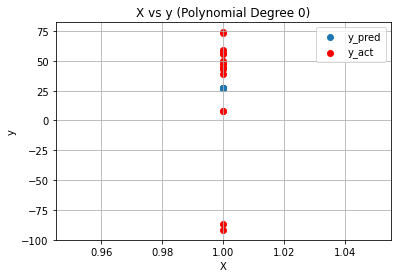

RMSE (degree2) 34.991096631962904
RMSE (degree2) 33.940612024298716


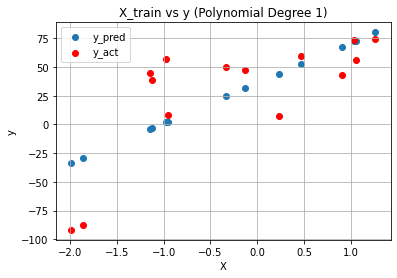

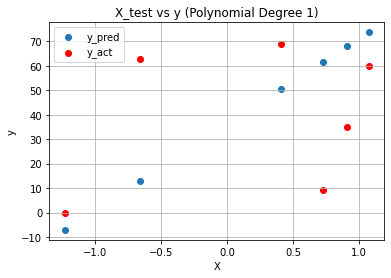

RMSE (degree3) 26.268485800798132
RMSE (degree3) 26.53178567207993


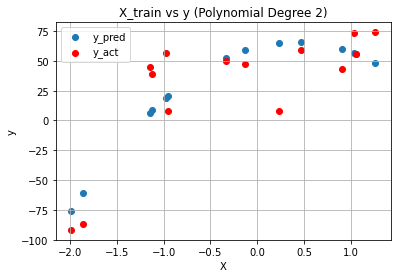

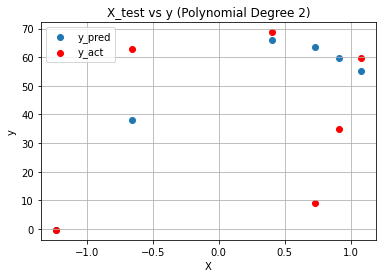

RMSE (degree4) 16.459745390431273
RMSE (degree4) 22.720165467990842


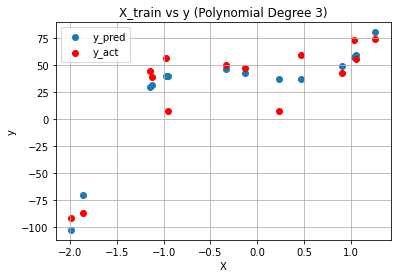

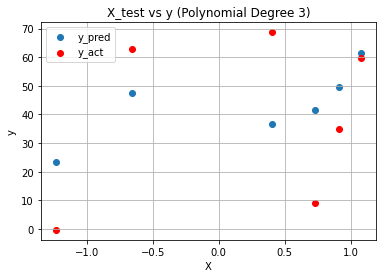

RMSE (degree5) 16.380687783354936
RMSE (degree5) 23.90327408279598


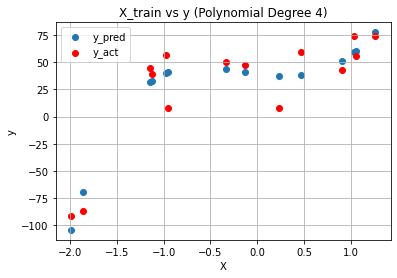

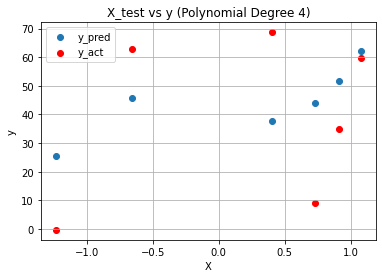

RMSE (degree6) 15.862247854613056
RMSE (degree6) 24.191125052992593


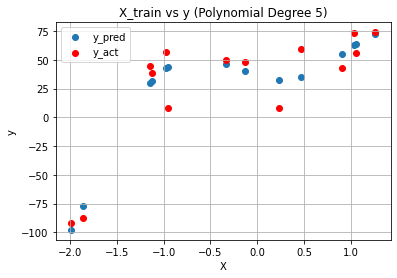

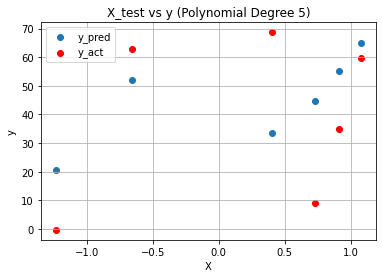

RMSE (degree7) 15.632319881459093
RMSE (degree7) 24.04057856966623


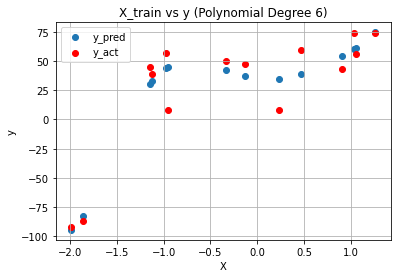

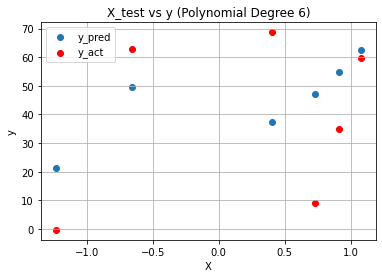

RMSE (degree8) 15.456625610816332
RMSE (degree8) 24.58964112329717


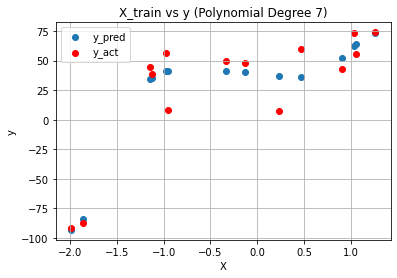

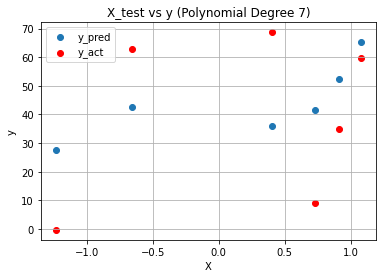

RMSE (degree9) 14.255528734256508
RMSE (degree9) 34.59152266096159


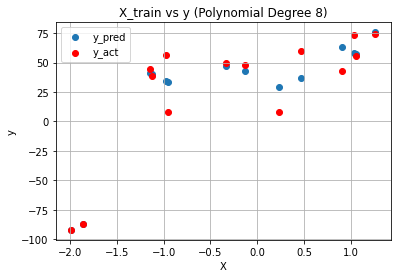

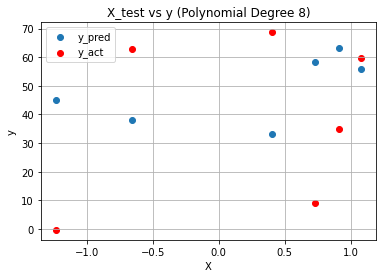

RMSE (degree10) 12.551102227155203
RMSE (degree10) 35.82985752736363


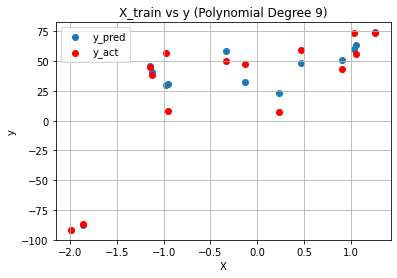

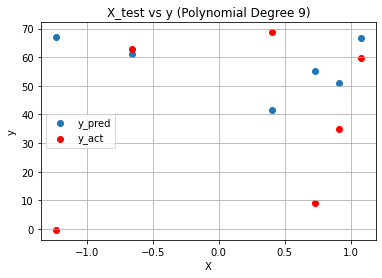

RMSE (degree11) 10.15679384647615
RMSE (degree11) 44.815244248361545


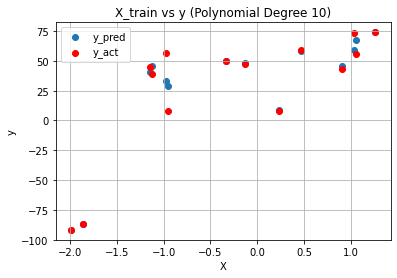

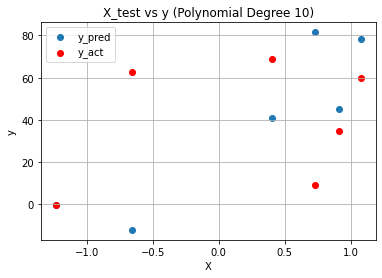

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import pylab
import scipy.stats as stats

df1 = pd.read_csv("train_2.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

n = len(y_train)
m= len(y_test)

X_list_train=[np.ones((n,1))]
X_list_test=[np.ones((m,1))]
w_ml_list = []

X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
w_ml_list.append(w_ml)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
plt.scatter(X_l_train,y_pred,label='y_pred')
plt.scatter(X_l_train,y_train,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y (Polynomial Degree 0)")
plt.legend()
plt.grid(visible=True)
plt.show()

max_degree = 12
rmse_train = []
rmse_test = []
for i in range(2,max_degree):
    X_l_train = np.ones((n,1))
    X_l_test = np.ones((m,1))
    for j in range(1,i):
        X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
        X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
    X_list_train.append(X_l_train)
    X_list_test.append(X_l_test)
    w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
    w_ml_list.append(w_ml)
    y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
    y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
    print(f'RMSE (degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

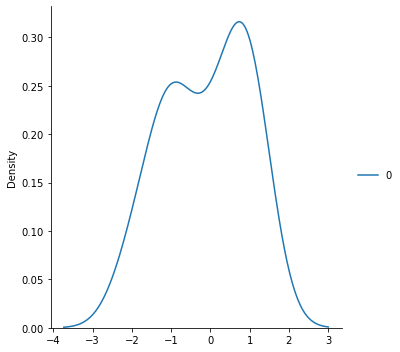

In [2]:
X1 = np.array(df[0]).reshape(-1,1)
sns.displot(X1,kind='kde')

C:\Users\hp\AppData\Local\Temp\ipykernel_8388\3183969530.py:1: RuntimeWarning: invalid value encountered in log
  x2 = np.log(X1-11)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


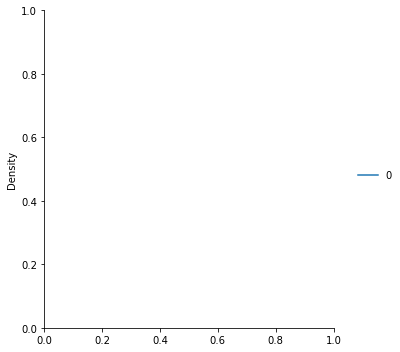

In [15]:
x2 = np.log(X1-11)
sns.displot(x2,kind='kde')

array([nan, nan])

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.linear_model import LinearRegression as LR

df1 = pd.read_csv("train_2.csv",header=None)
df = df1
X1 = np.array(df[0]).reshape(-1,1)
X = np.log(X1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(X_train)
model = LR()
model.fit(x_poly,y_train)
y_pred = model.predict(x_poly)
x_test_poly = poly.fit_transform(X_test)
y_test_pred = model.predict(x_test_poly)
print(f'RMSE (degree{i})',np.sqrt(mse(y_pred,y_train)))
print(f'RMSE (degree{i})',np.sqrt(mse(y_test_pred,y_test)))

plt.scatter(X_train,y_pred,label='y_pred')
plt.scatter(X_train,y_train,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"X_train vs y (Polynomial Degree {i-1})")
plt.grid(visible=True)
plt.legend()
plt.show()
plt.scatter(X_test,y_test_pred,label='y_pred')
plt.scatter(X_test,y_test,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"X_test vs y (Polynomial Degree {i-1})")
plt.grid(visible=True)
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8388\3634476595.py:16: RuntimeWarning: invalid value encountered in log
  X = np.log(X1)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

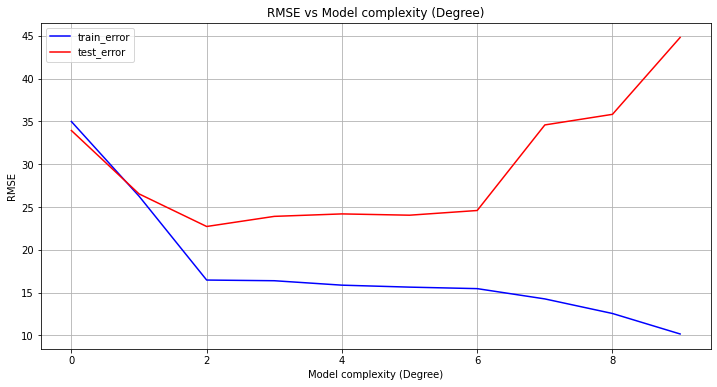

In [2]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree-2),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree-2),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for validation:  33.940612024298716


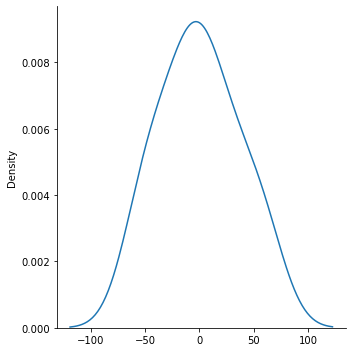

In [3]:
n = len(y_train)
m= len(y_test)
X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
degree=2
for j in range(1,degree):
    X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
    X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
train_noise = (y_pred.reshape(-1)-y_train)
sns.displot(train_noise,kind='kde')
print('rmse for validation: ', np.sqrt(mse(y_test_pred,y_test)))

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-54.72117433, -48.92124309, -41.87752854, -25.4004813 ,
         -16.12231123,  -6.87085681,  -5.31096988,  -1.42364494,
           6.2588882 ,  17.2060586 ,  24.57878893,  36.37101653,
          58.11164944,  58.12180843])),
 (38.39932894675197, 5.075305255429287e-15, 0.9883015785959525))

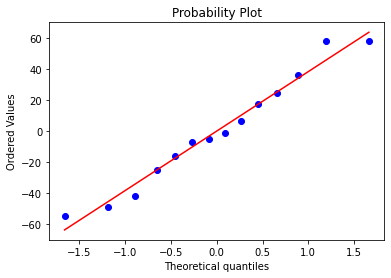

In [4]:
stats.probplot(train_noise,dist='norm',plot=pylab)

((array([-1.23132171, -0.63003387, -0.19819716,  0.19819716,  0.63003387,
          1.23132171]),
  array([-49.86883455, -18.39791367,  -6.82162107,  13.97188757,
          33.13690913,  52.40805355])),
 (41.62248687144412, 4.071413493738766, 0.9964994282444907))

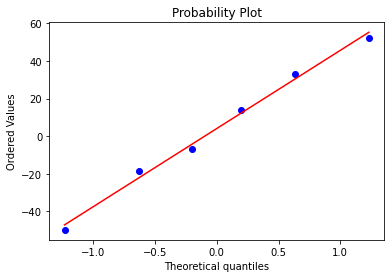

In [5]:
stats.probplot(y_test_pred.reshape(-1)-y_test,plot=pylab)

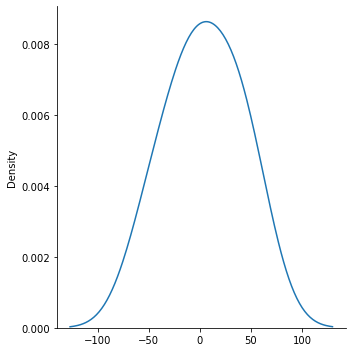

In [6]:
sns.displot(y_test_pred.reshape(-1)-y_test,kind='kde')

rmse for test:  97.23888527426205


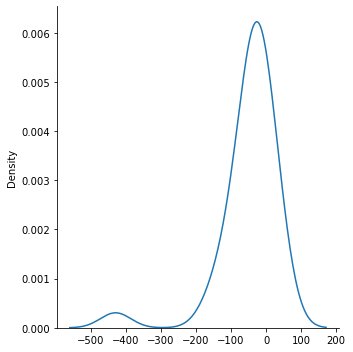

In [7]:
df_test = pd.read_csv('test_2.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])
m = len(y_t)
X_l_test = np.ones((m,1))
for j in range(1,degree):
    X_l_test = np.append(X_l_test, np.vstack(X_t**j),axis = 1)
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
test_noise = (y_test_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_test_pred,y_t)))

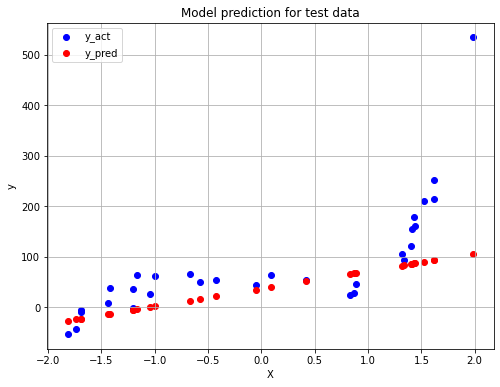

Optimized weights: [36.0730069  34.98558449]


In [8]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_test_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , w_ml)

##  2. Polynomial regression with L2 regularisation

RMSE (train)(degree0) 51.202147316557344
RMSE (test)(degree0) 29.409717481222305


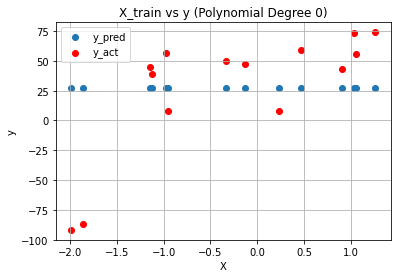

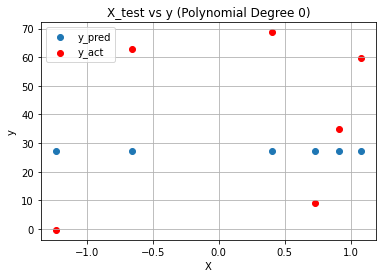

RMSE (train)(degree1) 35.0602613248043
RMSE (test)(degree1) 32.728322257550204


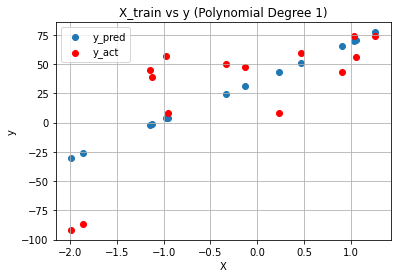

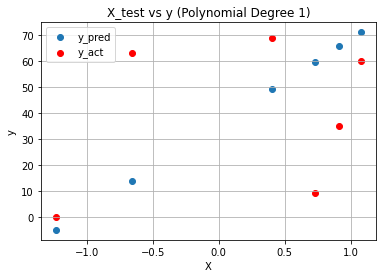

RMSE (train)(degree2) 26.31623871165584
RMSE (test)(degree2) 26.070020709897584


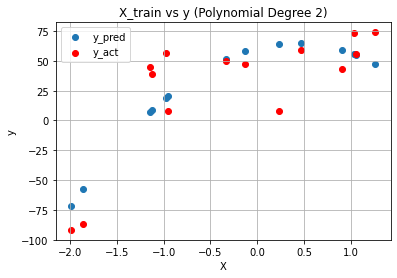

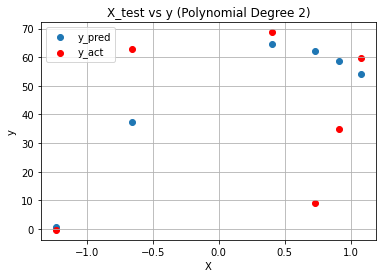

RMSE (train)(degree3) 16.820233812575072
RMSE (test)(degree3) 22.53428710672864


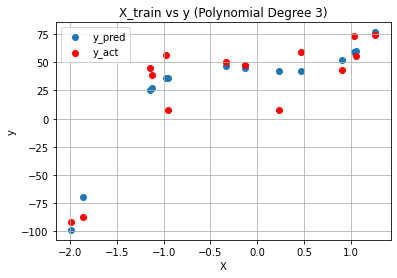

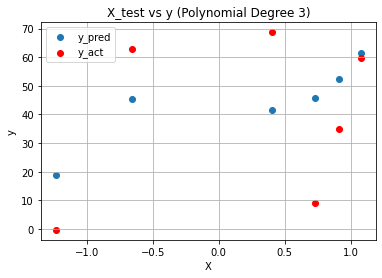

RMSE (train)(degree4) 16.674241603534995
RMSE (test)(degree4) 24.261291163975557


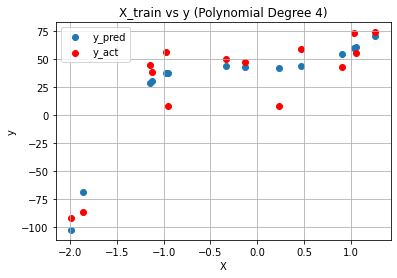

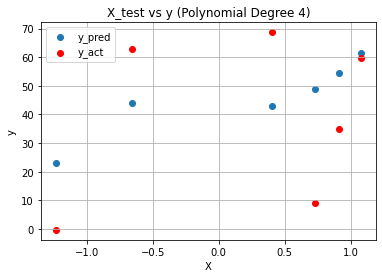

RMSE (train)(degree5) 16.87928778053329
RMSE (test)(degree5) 24.385258567349243


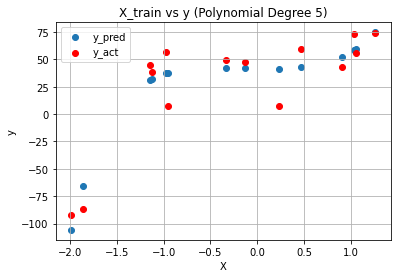

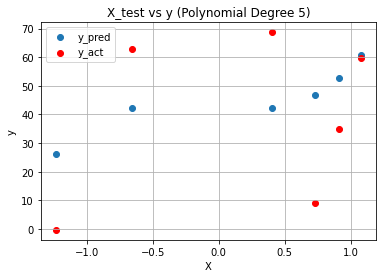

RMSE (train)(degree6) 16.538714732019884
RMSE (test)(degree6) 23.20493290505233


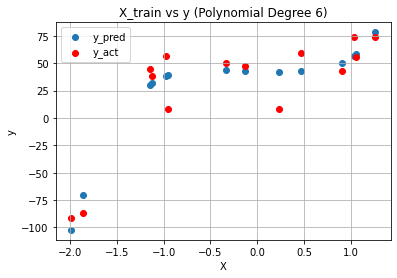

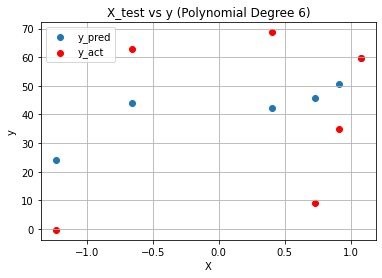

RMSE (train)(degree7) 15.81364798751003
RMSE (test)(degree7) 23.721116312629757


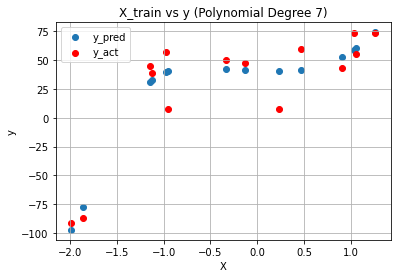

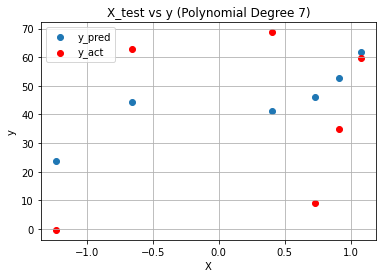

RMSE (train)(degree8) 15.611920379577688
RMSE (test)(degree8) 24.079915926493506


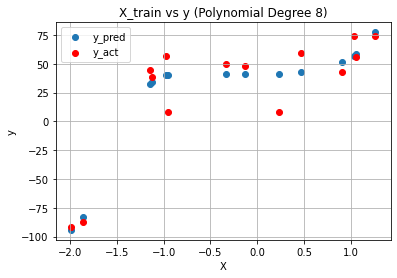

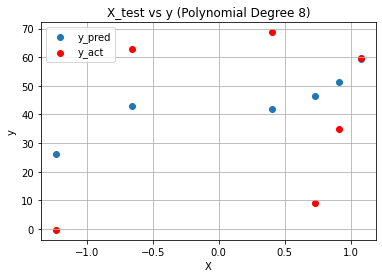

RMSE (train)(degree9) 15.291864205762133
RMSE (test)(degree9) 25.31533815701185


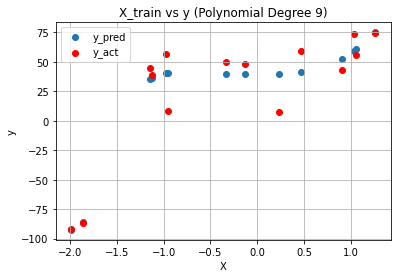

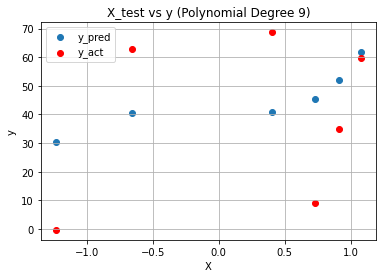

RMSE (train)(degree10) 15.252292744775536
RMSE (test)(degree10) 26.01569582025273


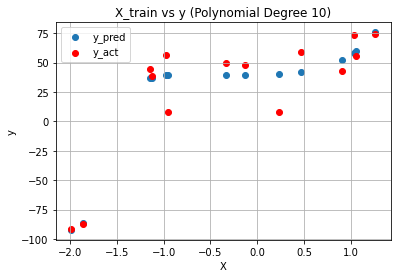

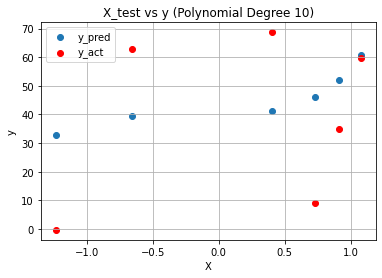

RMSE (train)(degree11) 15.056946664623974
RMSE (test)(degree11) 27.13088872860344


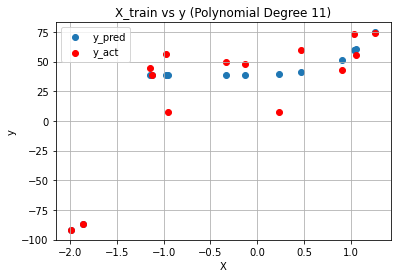

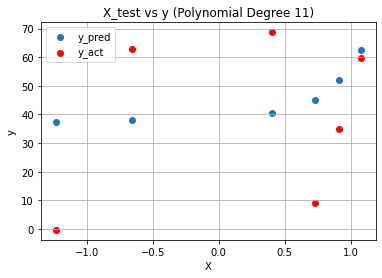

RMSE (train)(degree12) 15.037853050878718
RMSE (test)(degree12) 27.551333068057843


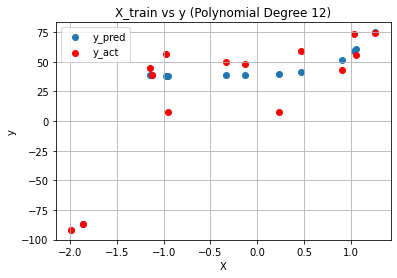

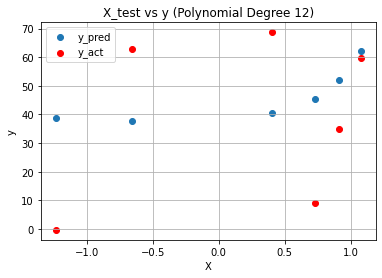

RMSE (train)(degree13) 14.891133906759297
RMSE (test)(degree13) 28.71896662404498


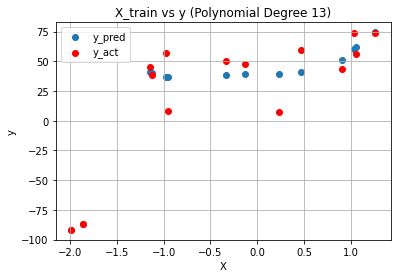

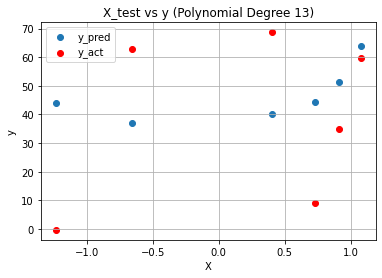

RMSE (train)(degree14) 14.883165503808428
RMSE (test)(degree14) 28.983675521028726


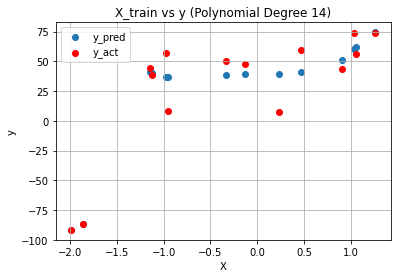

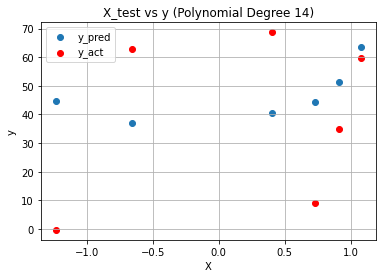

RMSE (train)(degree15) 14.788065128922346
RMSE (test)(degree15) 30.335343765920413


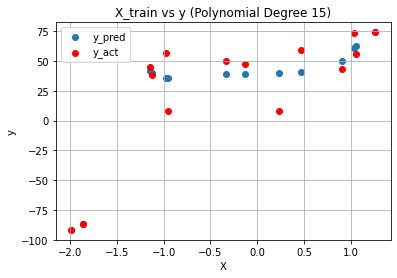

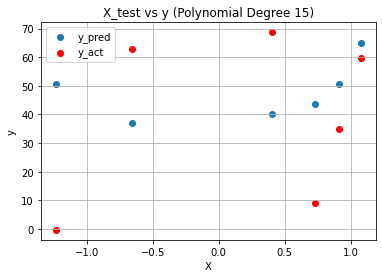

RMSE (train)(degree16) 14.785129418539771
RMSE (test)(degree16) 30.517619406022373


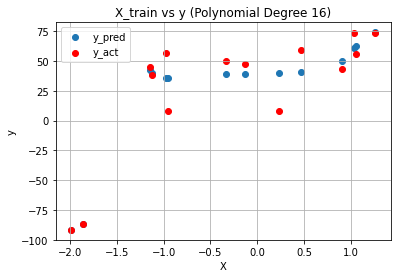

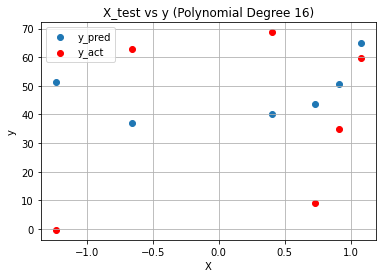

RMSE (train)(degree17) 14.734841388716992
RMSE (test)(degree17) 32.19334433595084


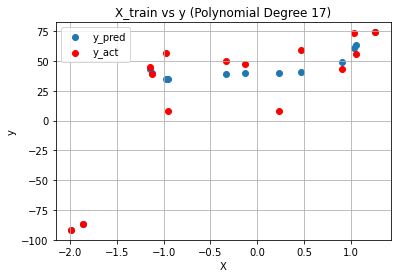

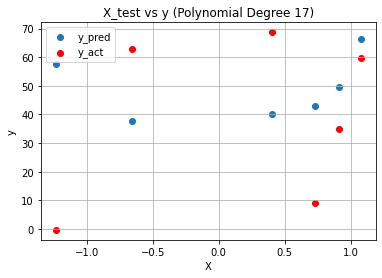

RMSE (train)(degree18) 14.733668657155844
RMSE (test)(degree18) 32.34034249548299


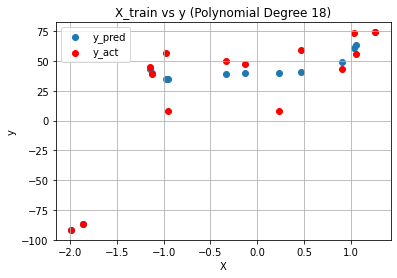

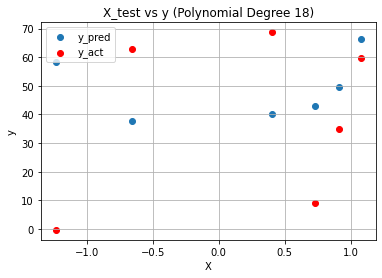

RMSE (train)(degree19) 14.71383745921162
RMSE (test)(degree19) 34.44237759977081


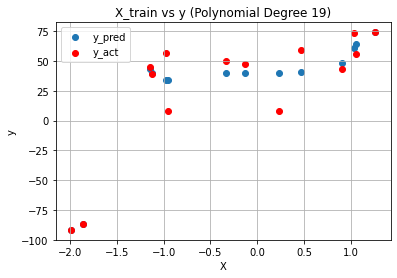

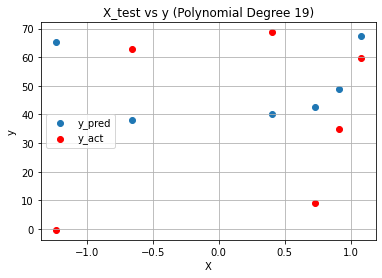

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
df1 = pd.read_csv("train_2.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(max_degree):
#     print(i)
    poly = PolynomialFeatures(degree = i)
    x_poly_train = poly.fit_transform(X_train)
    model = Ridge()
    model.fit(x_poly_train,y_train)
    y_pred = model.predict(x_poly_train)
    x_poly_test = poly.fit_transform(X_test)
    y_test_pred = model.predict(x_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

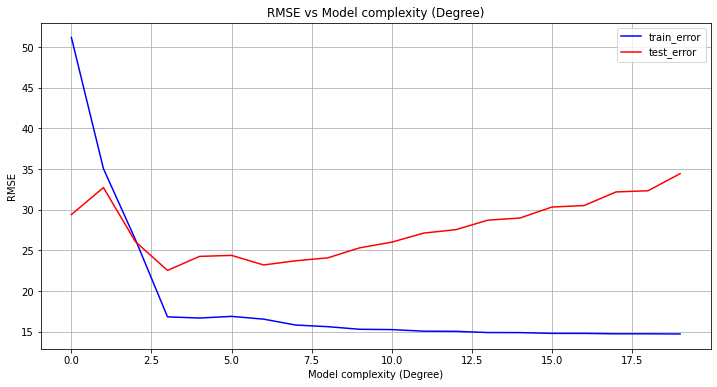

In [10]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test:  16.207933079860183


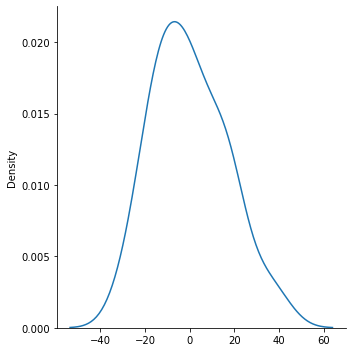

In [11]:
df_test = pd.read_csv('test_2.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])


poly = PolynomialFeatures(degree = 9)
x_poly = poly.fit_transform(X_t)
model = Ridge(alpha=1)
model.fit(x_poly,y_t)
y_pred = model.predict(x_poly)

test_noise = (y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_pred,y_t)))

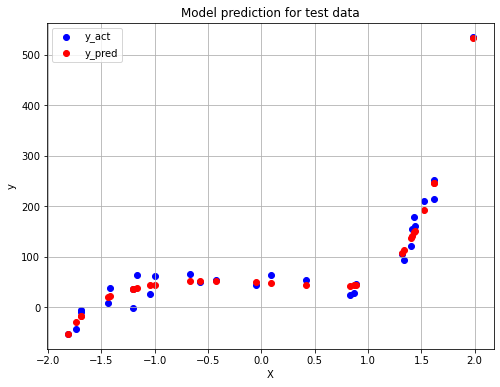

Optimized weights: [  0.         -11.96977779 -10.8015545    3.17347377  -0.38462042
  11.45250204  10.71383462   0.63225389  -1.90890853  -0.2011796 ]


In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , model.coef_)

## 3. Polynomial regression with L1 regularisation

RMSE (train)(degree0) 51.202147316557344
RMSE (test)(degree0) 29.409717481222305


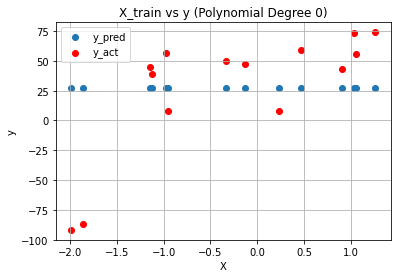

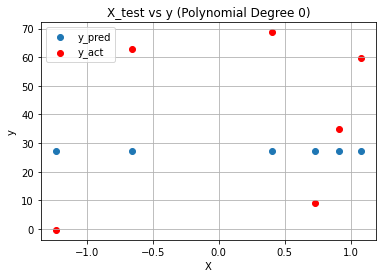

RMSE (train)(degree1) 35.003611569051564
RMSE (test)(degree1) 33.41589230576804


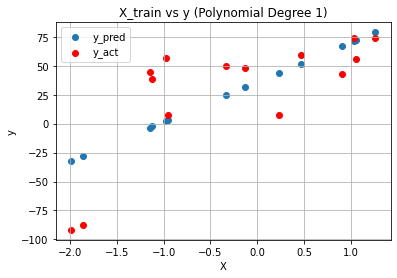

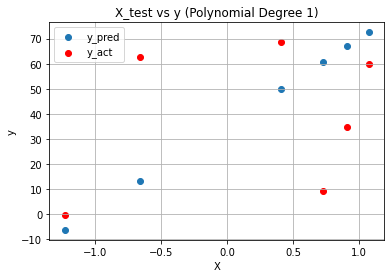

RMSE (train)(degree2) 26.28850277637942
RMSE (test)(degree2) 26.15157452945797


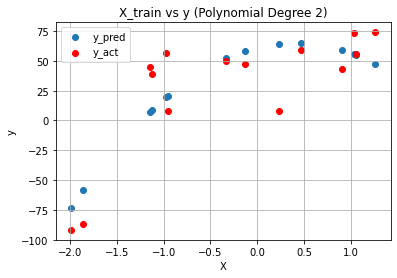

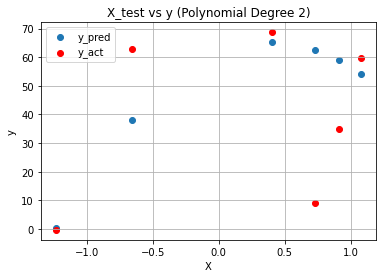

RMSE (train)(degree3) 16.97913697252532
RMSE (test)(degree3) 22.46288310250072


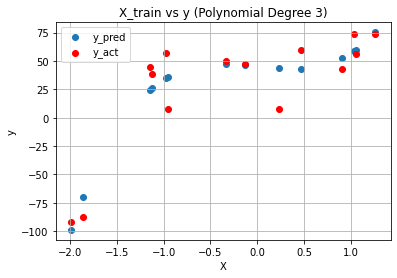

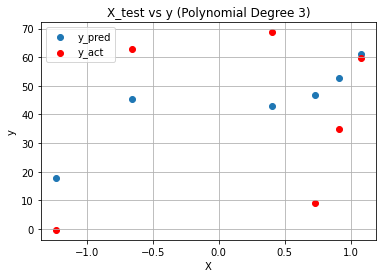

RMSE (train)(degree4) 17.044630247874977
RMSE (test)(degree4) 24.207943069121313


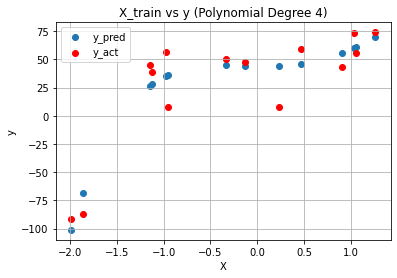

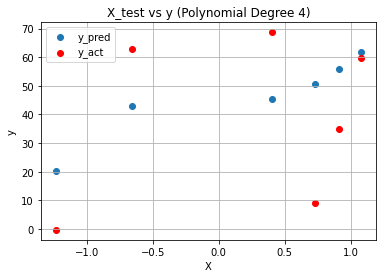

RMSE (train)(degree5) 17.100143819143074
RMSE (test)(degree5) 24.193135144897376


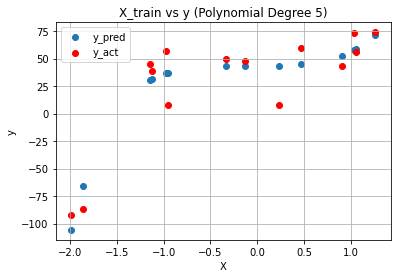

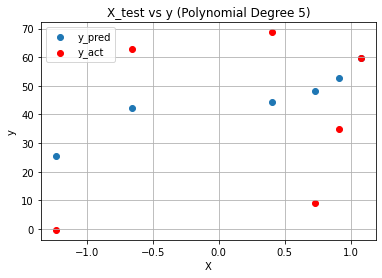

RMSE (train)(degree6) 17.009162050069854
RMSE (test)(degree6) 23.35002433112411


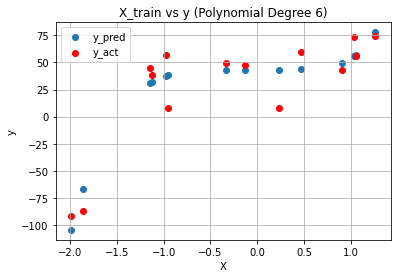

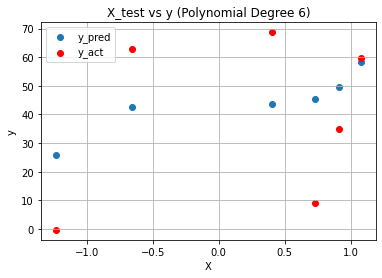

RMSE (train)(degree7) 16.3701499911256
RMSE (test)(degree7) 23.22498673354665


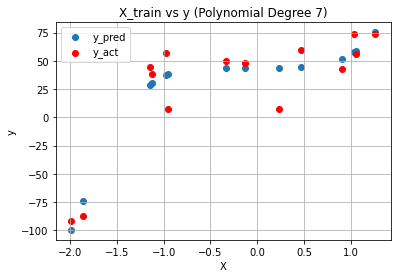

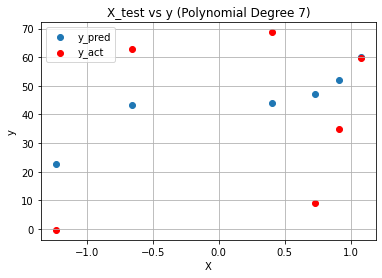

RMSE (train)(degree8) 16.115712992969925
RMSE (test)(degree8) 23.09404828224557


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+02, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


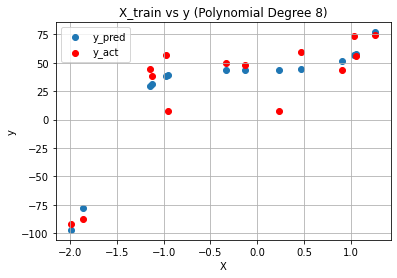

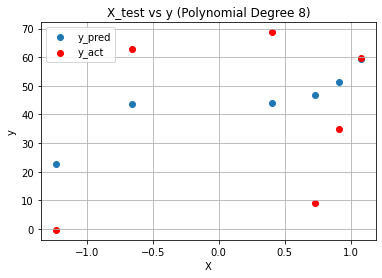

RMSE (train)(degree9) 15.781332410663888
RMSE (test)(degree9) 23.48426821134904


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.204e+02, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


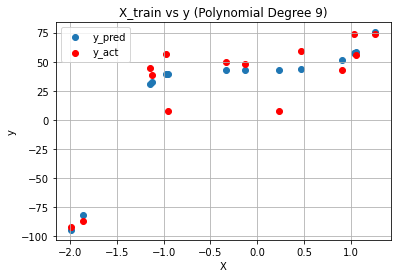

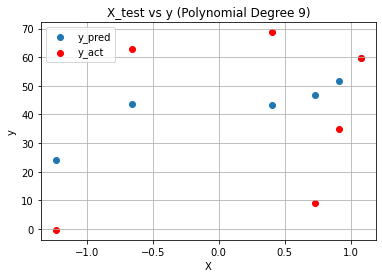

RMSE (train)(degree10) 15.690959421623209
RMSE (test)(degree10) 23.597428432115763


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.214e+02, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


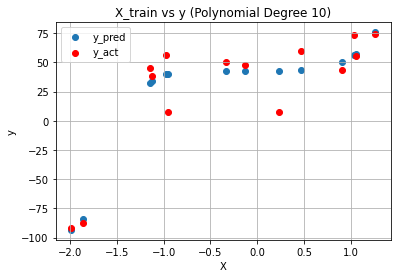

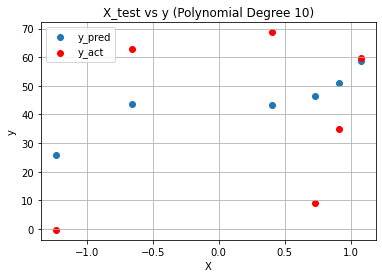

RMSE (train)(degree11) 15.661485451412489
RMSE (test)(degree11) 23.68995736186238


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


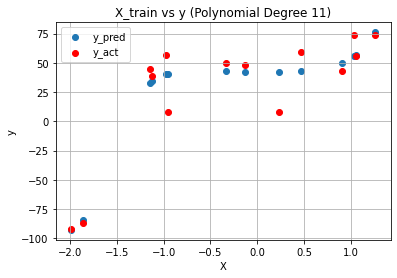

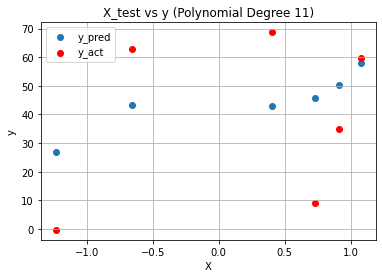

RMSE (train)(degree12) 15.633444279578375
RMSE (test)(degree12) 23.870235494103493


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


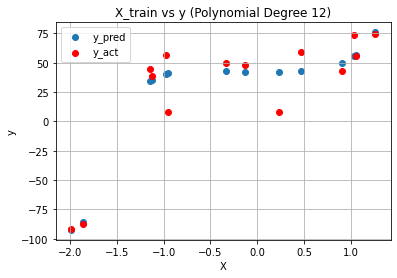

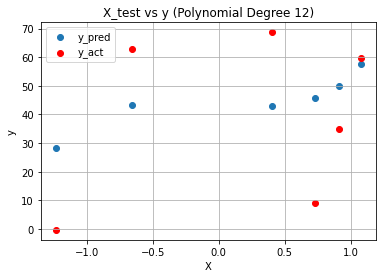

RMSE (train)(degree13) 15.62358682199315
RMSE (test)(degree13) 23.969948003611343


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


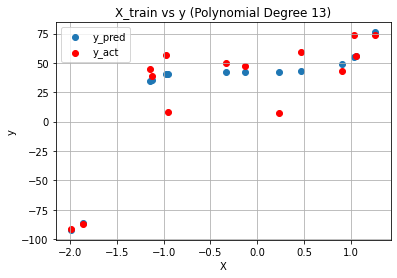

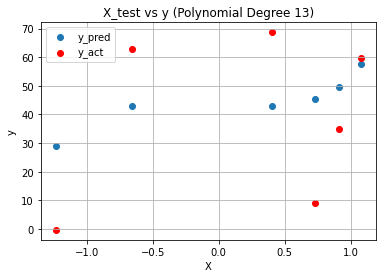

RMSE (train)(degree14) 15.623605353896101
RMSE (test)(degree14) 24.053553758991722


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


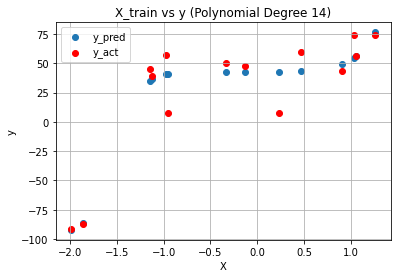

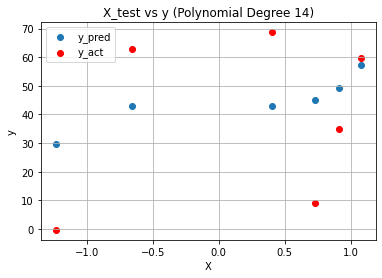

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree15) 15.614325047219278
RMSE (test)(degree15) 24.179255773507556


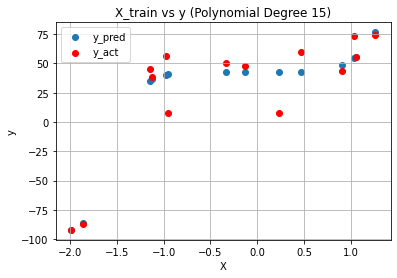

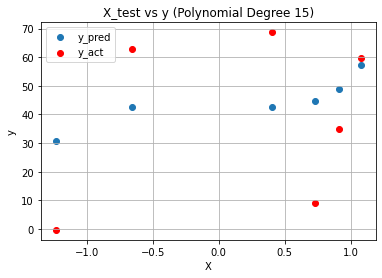

RMSE (train)(degree16) 15.59450610283118
RMSE (test)(degree16) 24.346800418690133


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


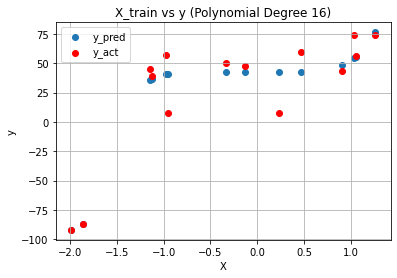

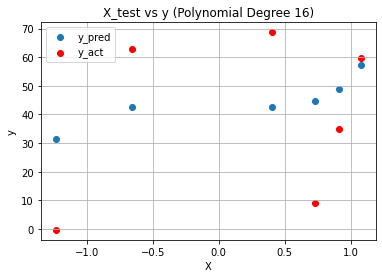

RMSE (train)(degree17) 15.572040222839213
RMSE (test)(degree17) 24.481635701709074


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


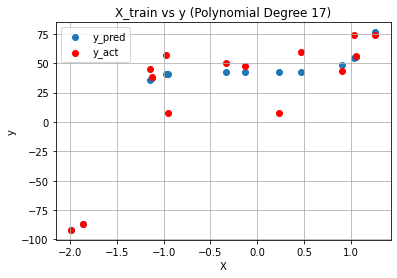

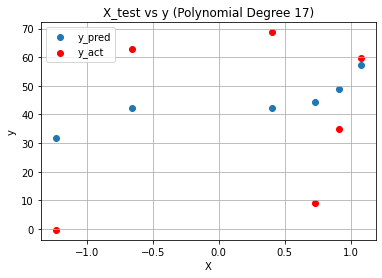

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree18) 15.554361589023076
RMSE (test)(degree18) 24.577498852241543


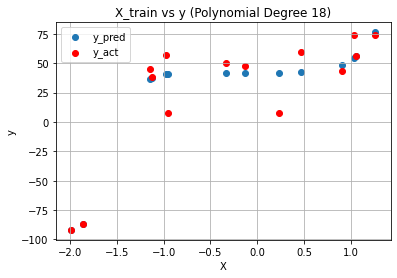

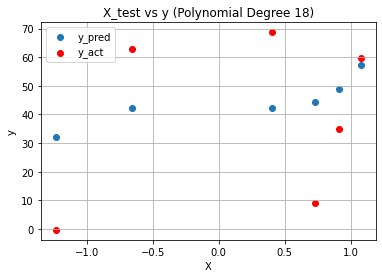

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.811e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree19) 15.537597530364126
RMSE (test)(degree19) 24.666775839267196


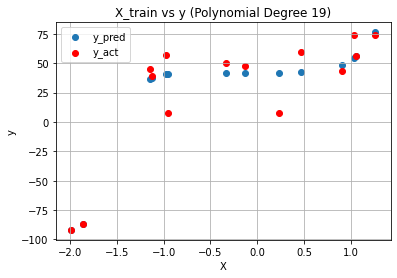

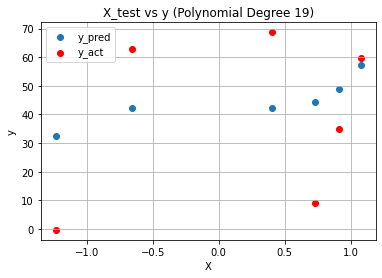

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

df1 = pd.read_csv("train_2.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(max_degree):
#     print(i)
    poly = PolynomialFeatures(degree = i)
    x_poly_train = poly.fit_transform(X_train)
    model = Lasso()
    model.fit(x_poly_train,y_train)
    y_pred = model.predict(x_poly_train)
    x_poly_test = poly.fit_transform(X_test)
    y_test_pred = model.predict(x_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

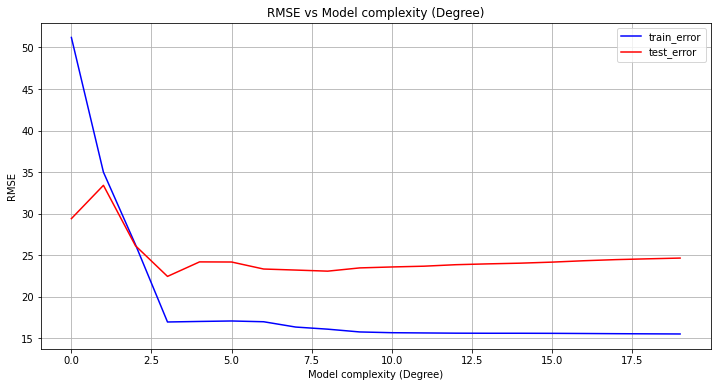

In [14]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.307e+03, tolerance: 3.733e+01
  model = cd_fast.enet_coordinate_descent(


rmse for test:  16.951627831593644


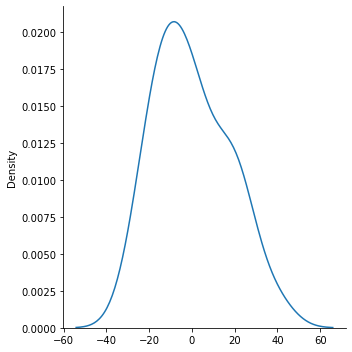

In [15]:
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])


poly = PolynomialFeatures(degree = 11)
x_poly = poly.fit_transform(X_t)
model = Lasso()
model.fit(x_poly,y_t)
y_pred = model.predict(x_poly)

test_noise = (y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_pred,y_t)))

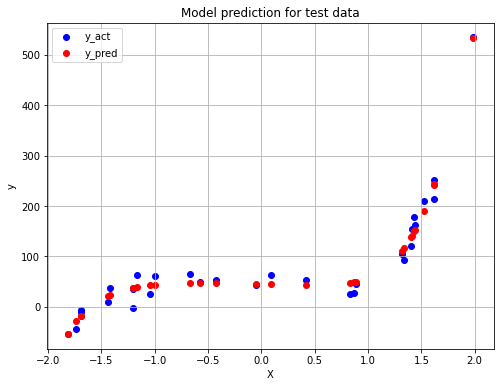

Optimized weights: [ 0.00000000e+00 -5.39236985e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.11085266e+01  5.07602296e+00  6.67987911e-01
  2.94260971e-01 -1.28689181e-01 -2.44235252e-01 -7.53859656e-03]


In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , model.coef_)

## for 70 data points

## 1. Polynomial regression without regularisation

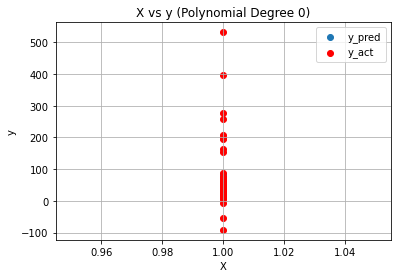

RMSE (degree2) 77.29932947196932
RMSE (degree2) 68.90273202703929


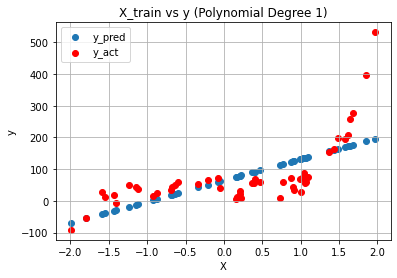

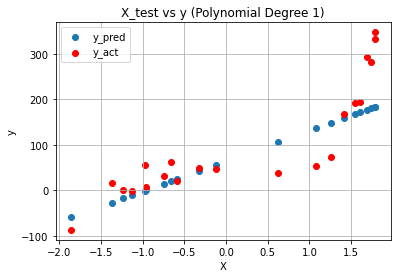

RMSE (degree3) 60.73255641634245
RMSE (degree3) 56.174485896413024


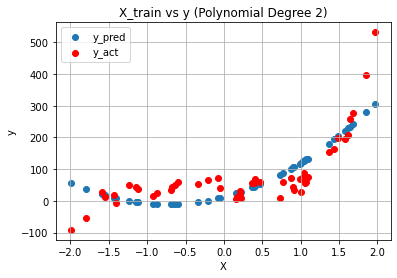

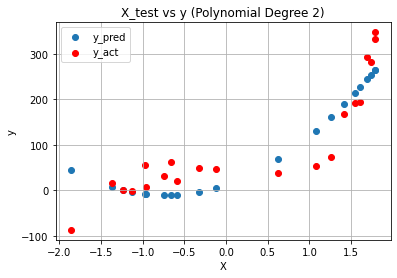

RMSE (degree4) 26.35272702079745
RMSE (degree4) 30.39334464810252


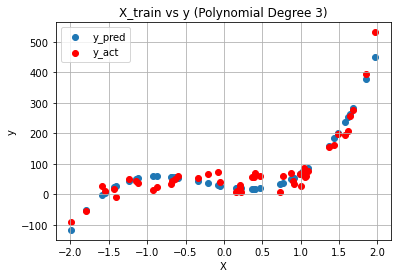

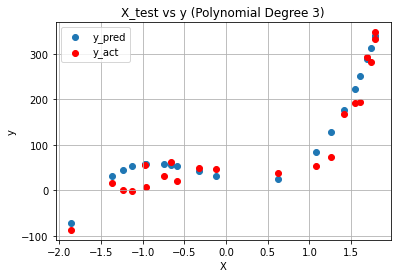

RMSE (degree5) 21.28025798375823
RMSE (degree5) 24.965779658882887


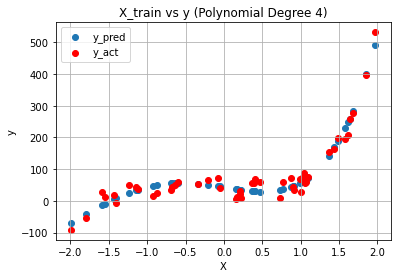

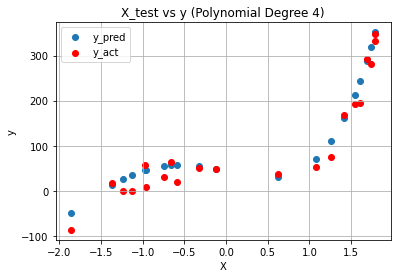

RMSE (degree6) 18.76893369691852
RMSE (degree6) 22.350005533690474


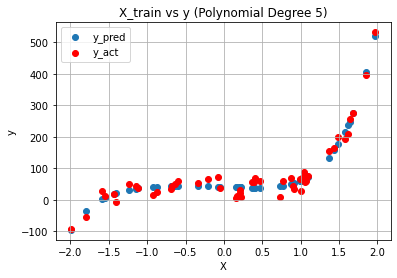

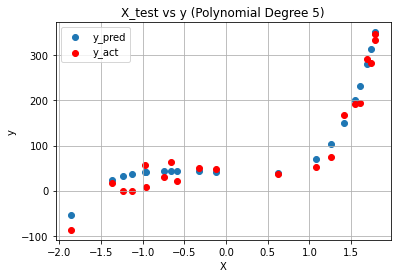

RMSE (degree7) 18.76348579276191
RMSE (degree7) 22.34571828637848


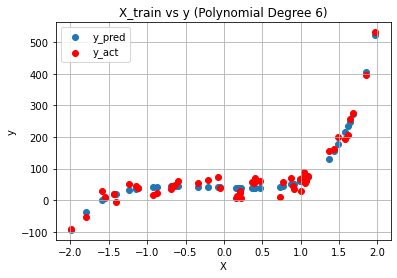

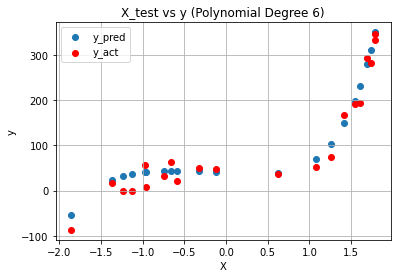

RMSE (degree8) 18.616336197943255
RMSE (degree8) 21.982374174836842


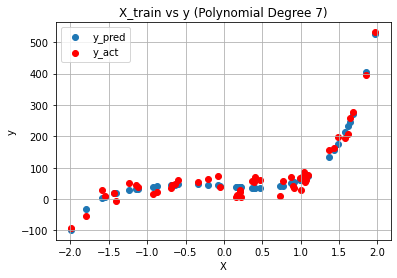

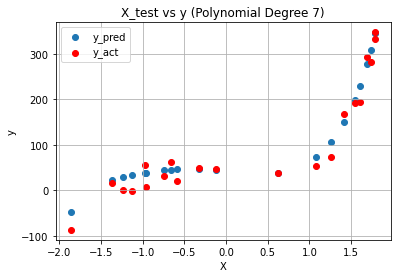

RMSE (degree9) 18.396865680606272
RMSE (degree9) 21.590383028662384


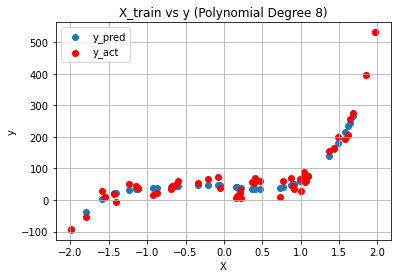

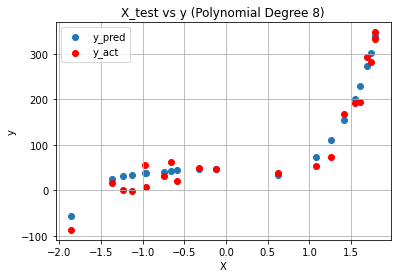

RMSE (degree10) 18.363130982565963
RMSE (degree10) 21.28595577000917


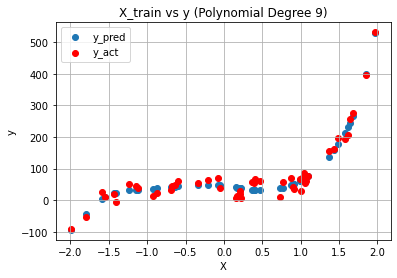

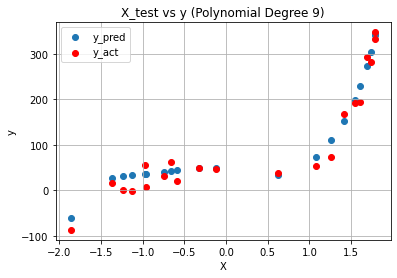

RMSE (degree11) 17.96246048791932
RMSE (degree11) 19.836579418942986


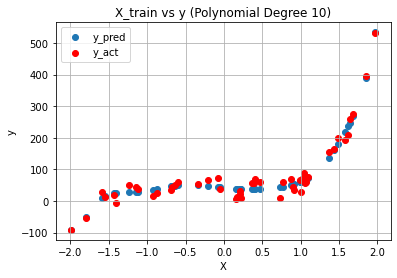

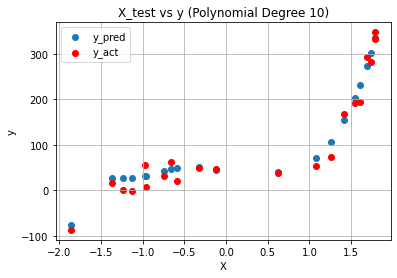

RMSE (degree12) 17.94640012254023
RMSE (degree12) 20.018378960627963


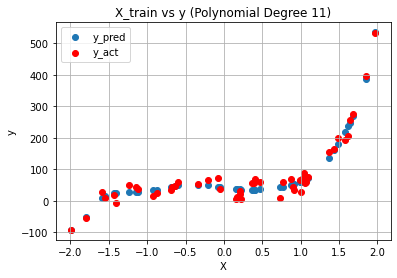

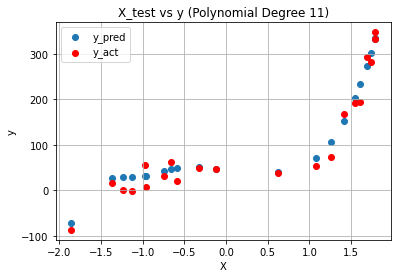

RMSE (degree13) 17.246895581025818
RMSE (degree13) 23.068494019232446


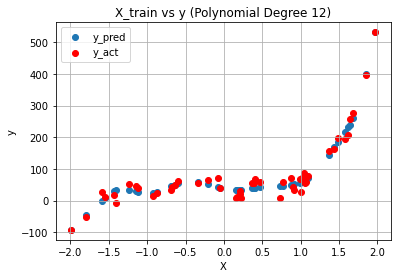

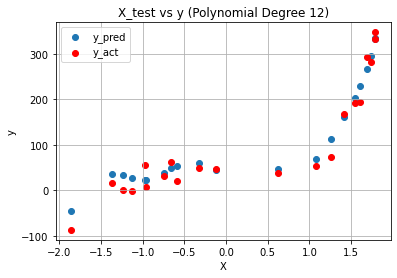

RMSE (degree14) 16.65308529176092
RMSE (degree14) 21.417885664055174


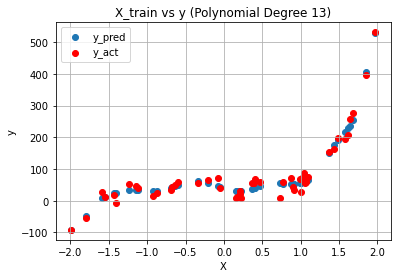

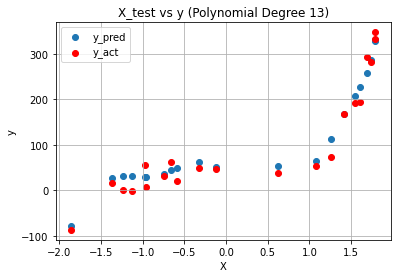

RMSE (degree15) 14.09666209041579
RMSE (degree15) 32.7470834293347


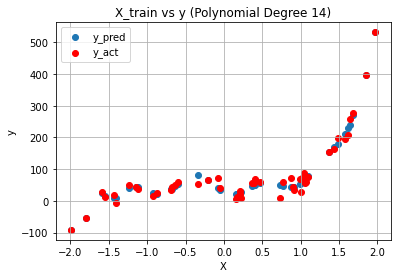

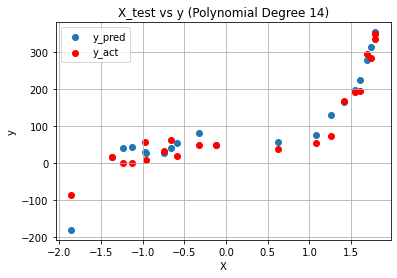

RMSE (degree16) 14.086074344881158
RMSE (degree16) 31.584436796081537


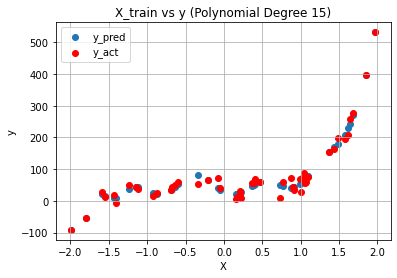

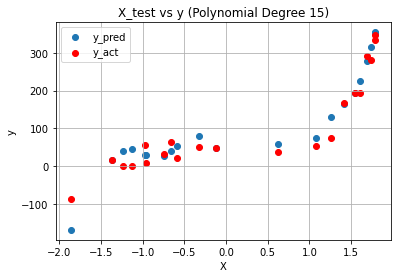

RMSE (degree17) 13.944789744196349
RMSE (degree17) 42.78021895392998


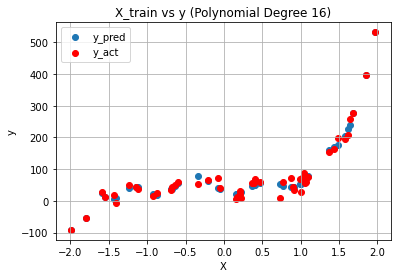

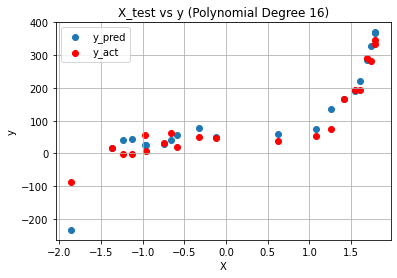

RMSE (degree18) 13.751504390613016
RMSE (degree18) 76.81601007463507


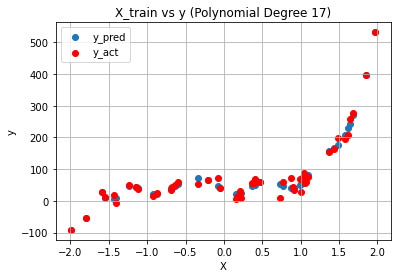

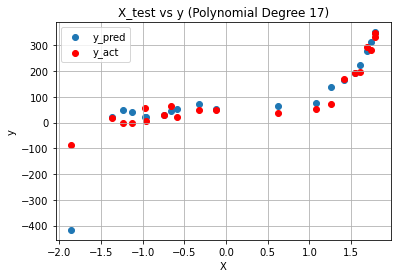

RMSE (degree19) 13.48462894419542
RMSE (degree19) 160.17859243313464


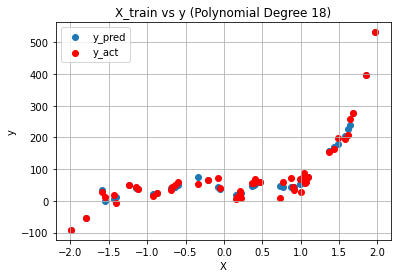

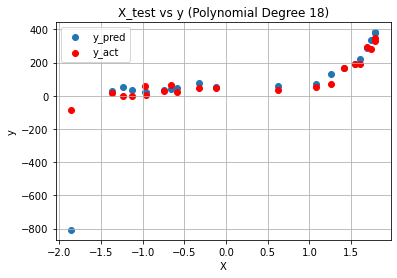

In [17]:
df1 = pd.read_csv("train_2.csv",header=None)
df = df1
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

n = len(y_train)
m= len(y_test)

X_list_train=[np.ones((n,1))]
X_list_test=[np.ones((m,1))]
w_ml_list = []

X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
w_ml_list.append(w_ml)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
plt.scatter(X_l_train,y_pred,label='y_pred')
plt.scatter(X_l_train,y_train,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y (Polynomial Degree 0)")
plt.legend()
plt.grid(visible=True)
plt.show()

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(2,max_degree):
    X_l_train = np.ones((n,1))
    X_l_test = np.ones((m,1))
    for j in range(1,i):
        X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
        X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
    X_list_train.append(X_l_train)
    X_list_test.append(X_l_test)
    w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
    w_ml_list.append(w_ml)
    y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
    y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
    print(f'RMSE (degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

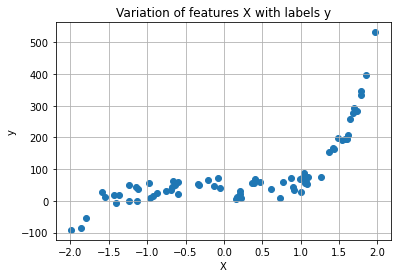

In [18]:
plt.figure()
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Variation of features X with labels y')
plt.grid()
plt.show()

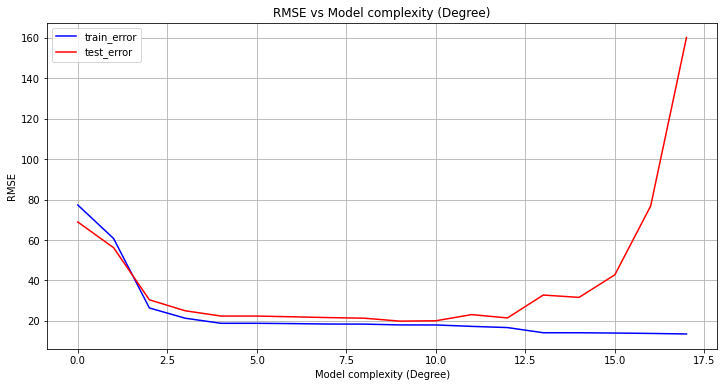

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree-2),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree-2),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

mean: -2.6448140729649934e-12 , standard daviation:  18.616336197943255 variance:  346.5679734348523


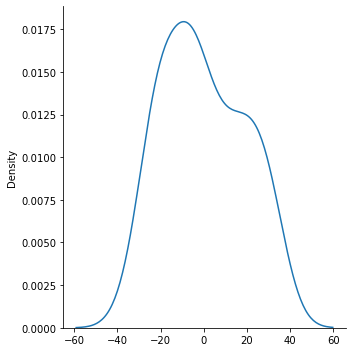

In [20]:
import seaborn as sns
n = len(y_train)
m= len(y_test)
X_l_train = np.ones((n,1))
X_l_test = np.ones((m,1))
degree=8
for j in range(1,degree):
    X_l_train = np.append(X_l_train, np.vstack(X_train**j),axis = 1)
    X_l_test = np.append(X_l_test, np.vstack(X_test**j),axis = 1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml = np.dot((la.inv(X_l_train.T @ X_l_train) @ X_l_train.T),y_train)
y_pred = np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
train_noise = (y_pred.reshape(-1)-y_train)
sns.displot(train_noise,kind='kde')
# plt.hist(train_noise,bins=10,density='kde')
print('mean:' ,np.mean(train_noise), ', standard daviation: ', np.std(train_noise), 'variance: ', np.std(train_noise)**2)

((array([-2.19599143, -1.82390984, -1.60415342, -1.44238152, -1.31143954,
         -1.19978245, -1.10136375, -1.01259654, -0.93116649, -0.85548631,
         -0.78441521, -0.71710218, -0.6528925 , -0.59126912, -0.53181425,
         -0.47418332, -0.41808671, -0.36327662, -0.30953737, -0.25667804,
         -0.20452679, -0.1529263 , -0.10173007, -0.05079928,  0.        ,
          0.05079928,  0.10173007,  0.1529263 ,  0.20452679,  0.25667804,
          0.30953737,  0.36327662,  0.41808671,  0.47418332,  0.53181425,
          0.59126912,  0.6528925 ,  0.71710218,  0.78441521,  0.85548631,
          0.93116649,  1.01259654,  1.10136375,  1.19978245,  1.31143954,
          1.44238152,  1.60415342,  1.82390984,  2.19599143]),
  array([-33.13005028, -28.39992265, -23.87510246, -23.87479143,
         -22.9801279 , -21.84569849, -21.43956369, -21.07585904,
         -20.86780319, -20.67740305, -19.75379545, -19.7145674 ,
         -15.53524971, -13.92868188, -12.7375271 , -12.58042895,
          -

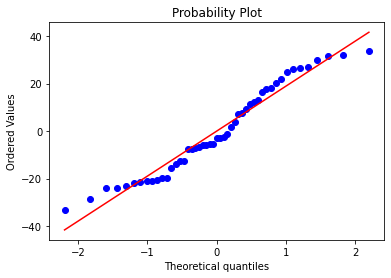

In [21]:
stats.probplot(train_noise,dist='norm',plot=pylab,)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-18.32131983, -17.54878336, -17.12259544, -15.62177644,
          -3.51899946,  -3.05714585,  -0.56606863,   0.29160736,
           4.46477472,   6.13407287,  12.12278449,  12.96721353,
          19.06985517,  26.26383124,  26.75022579,  28.88784467,
          31.02415112,  32.59365138,  33.60964448,  36.04112517,
          38.92447359])),
 (19.84136702730396, 11.113741264673159, 0.9708730593318026))

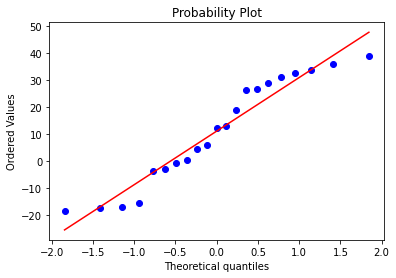

In [22]:
test_noise = y_test_pred.reshape(-1)-y_test
stats.probplot(test_noise,plot=pylab)

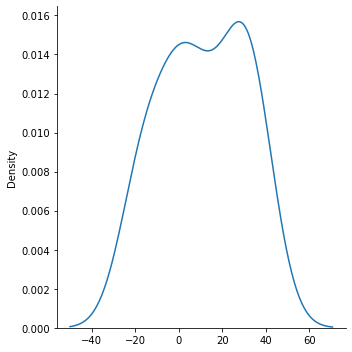

In [23]:
sns.displot(test_noise,kind='kde')

In [24]:
print('mean:' ,np.mean(test_noise), ', standard daviation: ', np.std(test_noise), 'variance: ', np.std(test_noise)**2)

mean: 11.113741264673159 , standard daviation:  18.96600984562738 variance:  359.7095294644347


rmse for test:  18.43099118959732


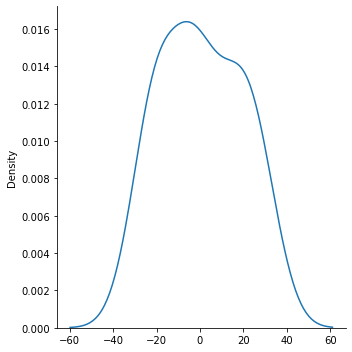

In [25]:
df_test = pd.read_csv('test_2.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])
m = len(y_t)
X_l_test = np.ones((m,1))
for j in range(1,degree):
    X_l_test = np.append(X_l_test, np.vstack(X_t**j),axis = 1)
y_test_pred = np.dot(X_l_test,w_ml.reshape(-1,1))
test_noise = (y_test_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_test_pred,y_t)))

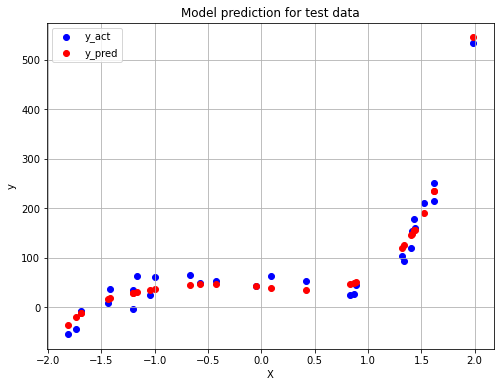

Optimized weights: [ 4.18913376e+01 -2.00883951e+01 -5.10693009e+00  3.56642745e+01
  1.30438436e+01 -5.33186768e+00 -1.49879690e-02  2.00251044e+00]


In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_test_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' ,w_ml)

## 2. Polynomial regression with L2 regularisation

RMSE (train)(degree0) 51.202147316557344
RMSE (test)(degree0) 29.409717481222305


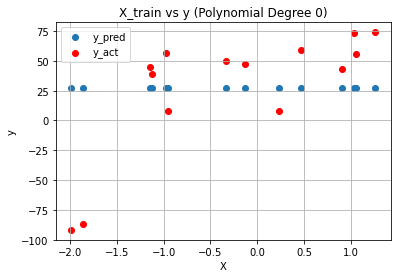

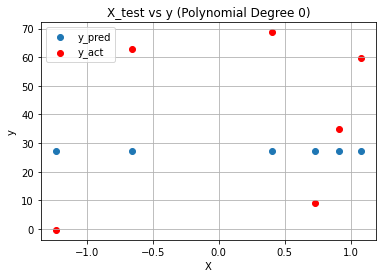

RMSE (train)(degree1) 35.0602613248043
RMSE (test)(degree1) 32.728322257550204


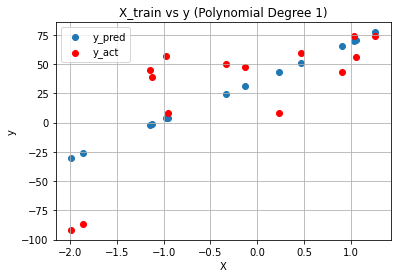

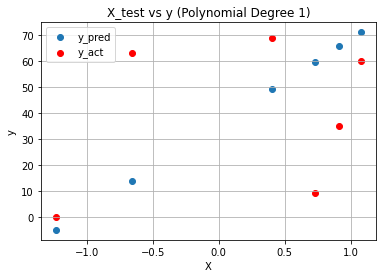

RMSE (train)(degree2) 26.31623871165584
RMSE (test)(degree2) 26.070020709897584


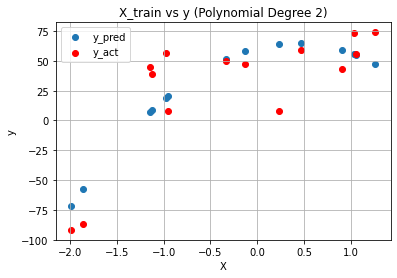

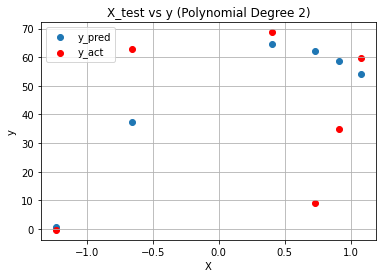

RMSE (train)(degree3) 16.820233812575072
RMSE (test)(degree3) 22.53428710672864


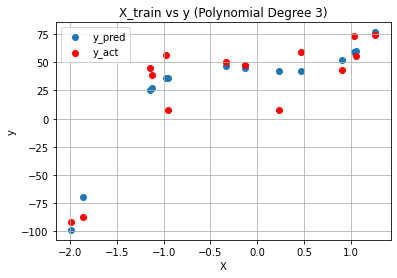

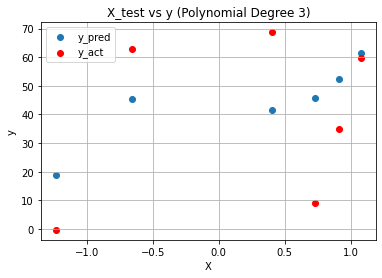

RMSE (train)(degree4) 16.674241603534995
RMSE (test)(degree4) 24.261291163975557


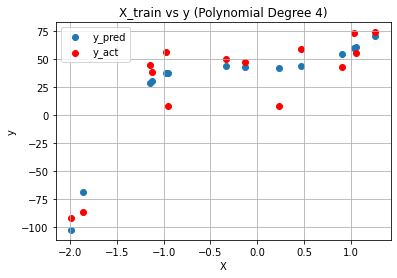

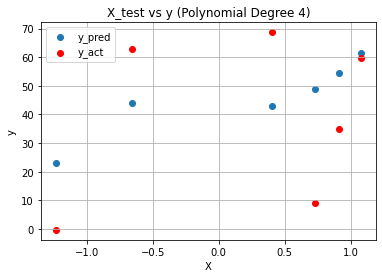

RMSE (train)(degree5) 16.87928778053329
RMSE (test)(degree5) 24.385258567349243


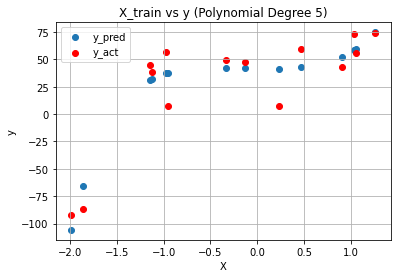

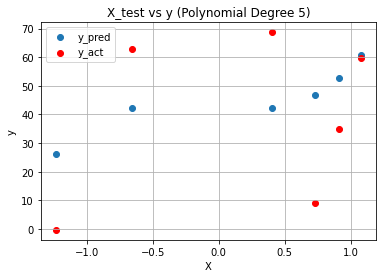

RMSE (train)(degree6) 16.538714732019884
RMSE (test)(degree6) 23.20493290505233


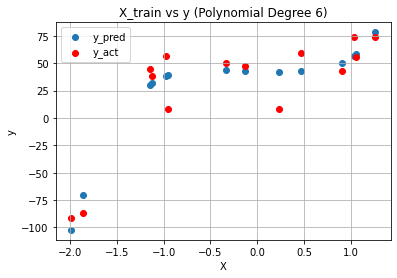

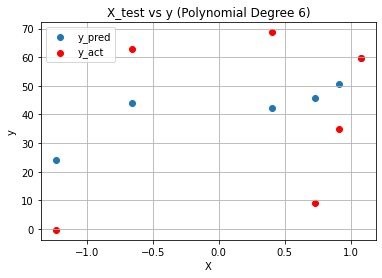

RMSE (train)(degree7) 15.81364798751003
RMSE (test)(degree7) 23.721116312629757


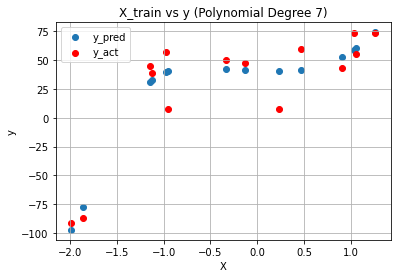

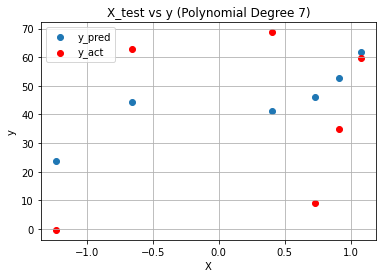

RMSE (train)(degree8) 15.611920379577688
RMSE (test)(degree8) 24.079915926493506


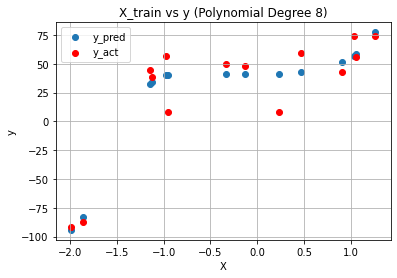

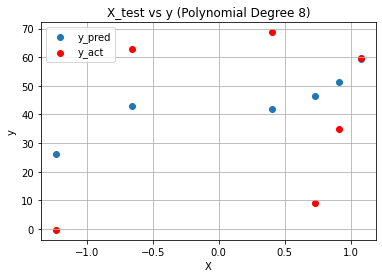

RMSE (train)(degree9) 15.291864205762133
RMSE (test)(degree9) 25.31533815701185


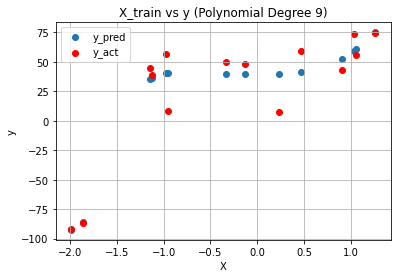

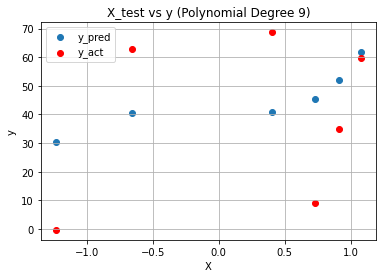

RMSE (train)(degree10) 15.252292744775536
RMSE (test)(degree10) 26.01569582025273


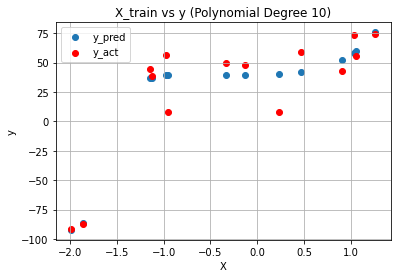

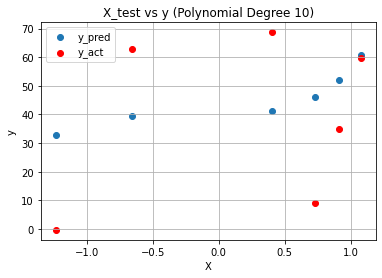

RMSE (train)(degree11) 15.056946664623974
RMSE (test)(degree11) 27.13088872860344


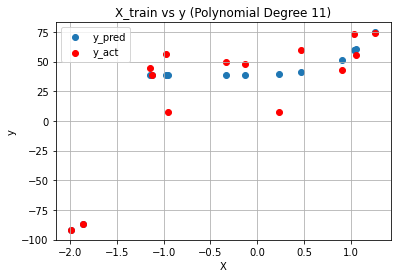

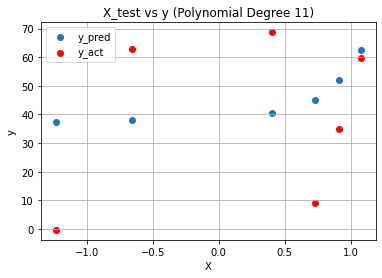

RMSE (train)(degree12) 15.037853050878718
RMSE (test)(degree12) 27.551333068057843


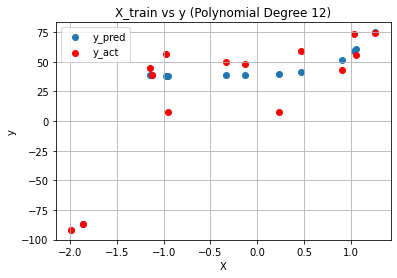

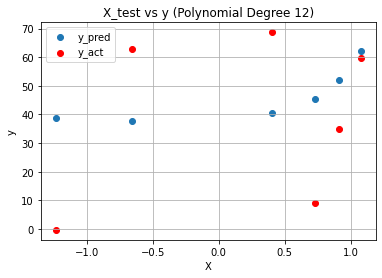

RMSE (train)(degree13) 14.891133906759297
RMSE (test)(degree13) 28.71896662404498


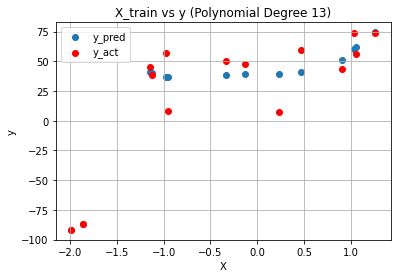

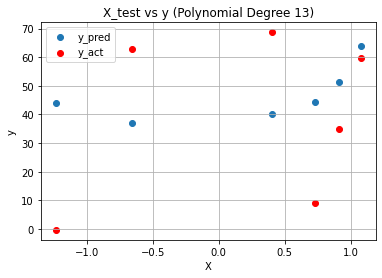

RMSE (train)(degree14) 14.883165503808428
RMSE (test)(degree14) 28.983675521028726


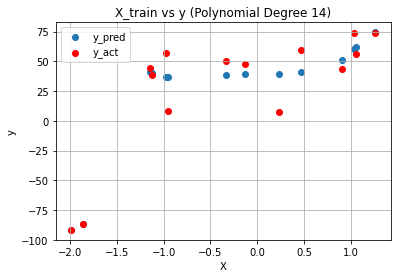

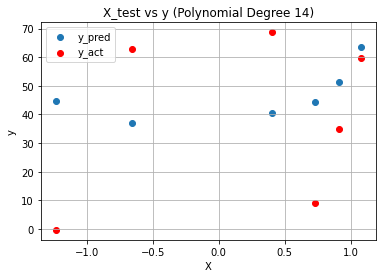

RMSE (train)(degree15) 14.788065128922346
RMSE (test)(degree15) 30.335343765920413


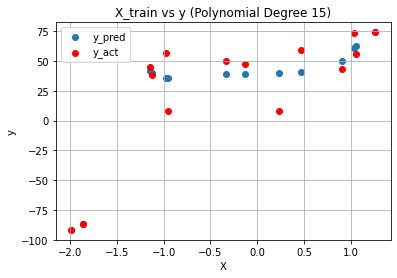

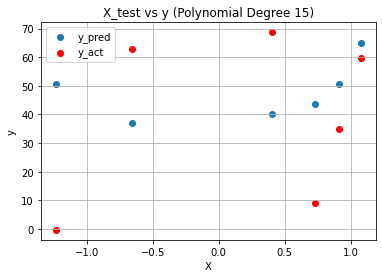

RMSE (train)(degree16) 14.785129418539771
RMSE (test)(degree16) 30.517619406022373


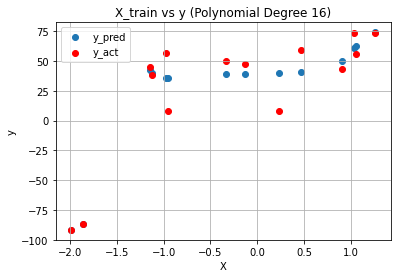

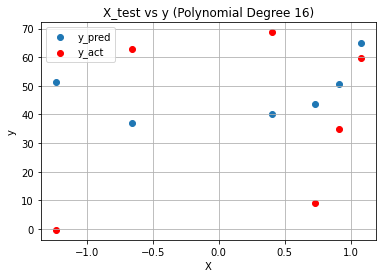

RMSE (train)(degree17) 14.734841388716992
RMSE (test)(degree17) 32.19334433595084


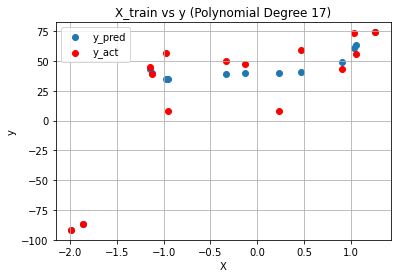

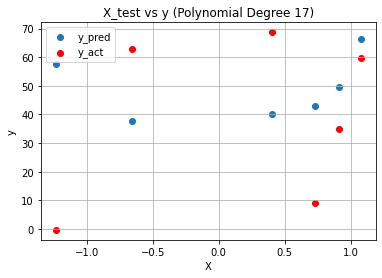

RMSE (train)(degree18) 14.733668657155844
RMSE (test)(degree18) 32.34034249548299


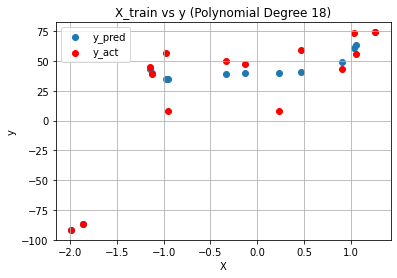

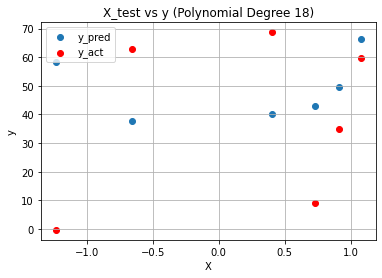

RMSE (train)(degree19) 14.71383745921162
RMSE (test)(degree19) 34.44237759977081


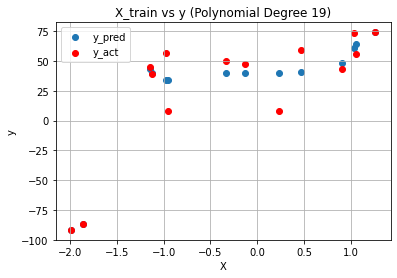

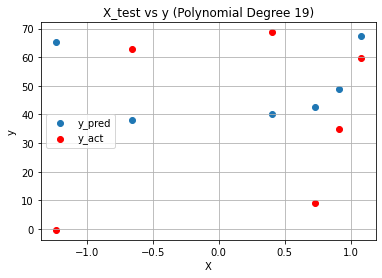

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
df1 = pd.read_csv("train_2.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(max_degree):
#     print(i)
    poly = PolynomialFeatures(degree = i)
    x_poly_train = poly.fit_transform(X_train)
    model = Ridge()
    model.fit(x_poly_train,y_train)
    y_pred = model.predict(x_poly_train)
    x_poly_test = poly.fit_transform(X_test)
    y_test_pred = model.predict(x_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

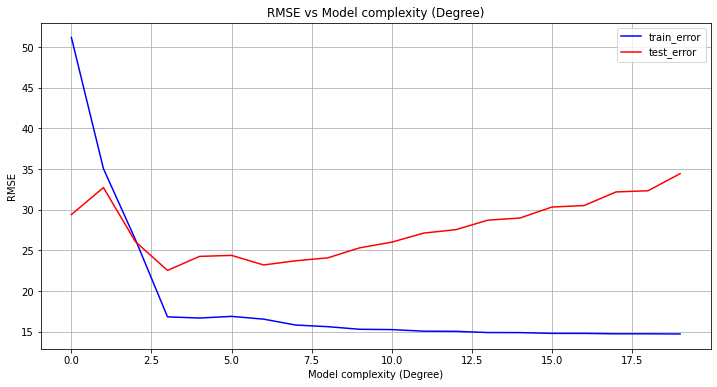

In [28]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test:  27.07918420489522


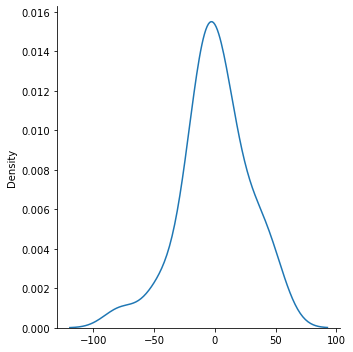

In [29]:
df_test = pd.read_csv('test_2.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])


poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(X_t)
model = Ridge(alpha=1)
model.fit(x_poly,y_t)
y_pred = model.predict(x_poly)

test_noise = (y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_pred,y_t)))

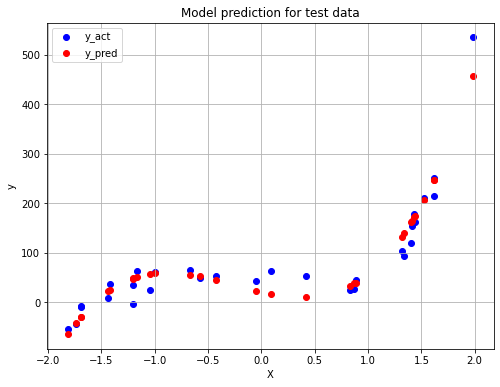

Optimized weights: [  0.         -49.88291543  36.859657    49.5201901 ]


In [30]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , model.coef_)

## 3. Polynomial regression with L1 regularisation

RMSE (train)(degree0) 51.202147316557344
RMSE (test)(degree0) 29.409717481222305


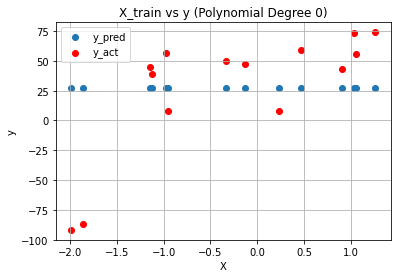

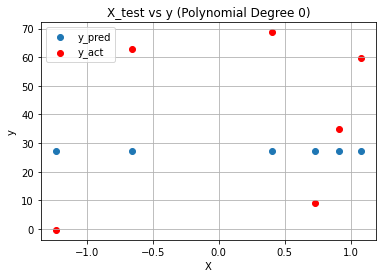

RMSE (train)(degree1) 35.003611569051564
RMSE (test)(degree1) 33.41589230576804


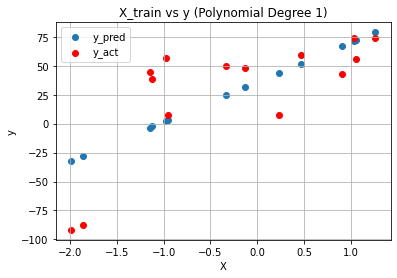

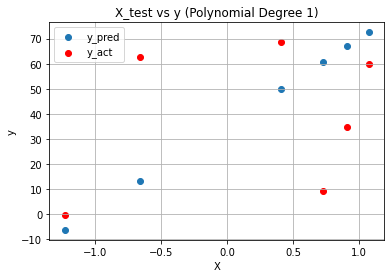

RMSE (train)(degree2) 26.28850277637942
RMSE (test)(degree2) 26.15157452945797


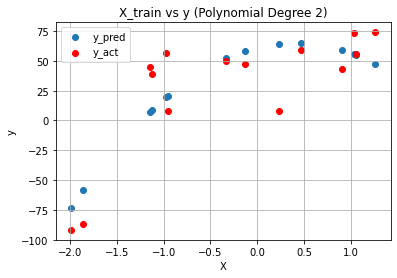

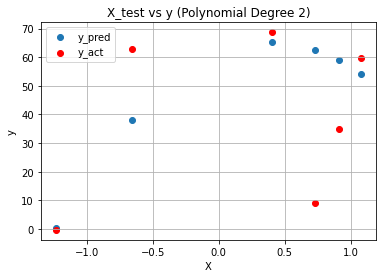

RMSE (train)(degree3) 16.97913697252532
RMSE (test)(degree3) 22.46288310250072


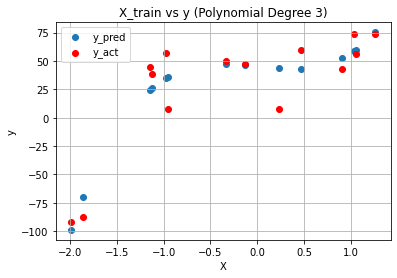

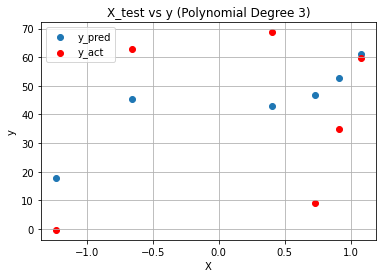

RMSE (train)(degree4) 17.044630247874977
RMSE (test)(degree4) 24.207943069121313


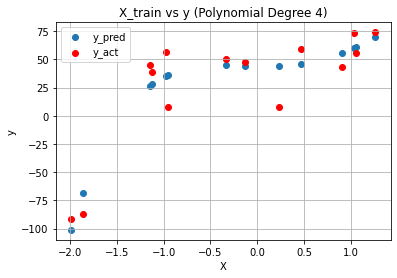

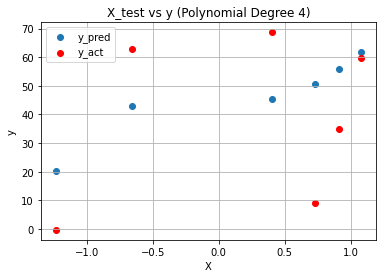

RMSE (train)(degree5) 17.100143819143074
RMSE (test)(degree5) 24.193135144897376


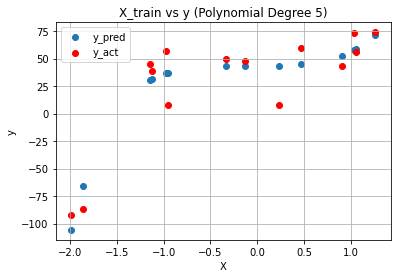

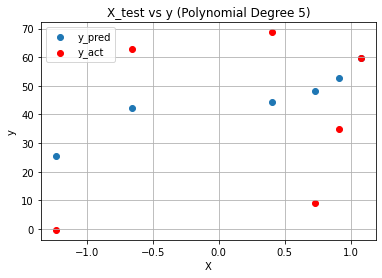

RMSE (train)(degree6) 17.009162050069854
RMSE (test)(degree6) 23.35002433112411


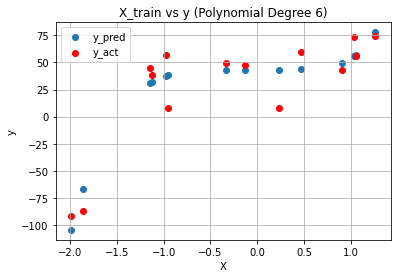

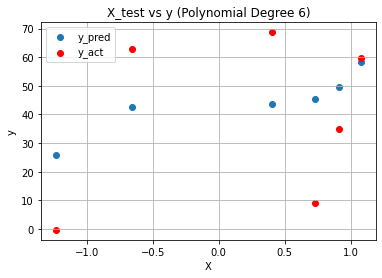

RMSE (train)(degree7) 16.3701499911256
RMSE (test)(degree7) 23.22498673354665


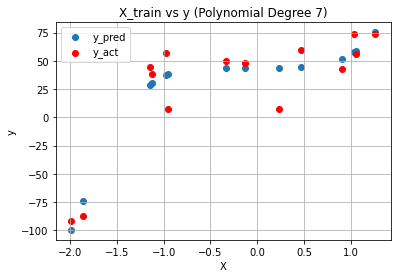

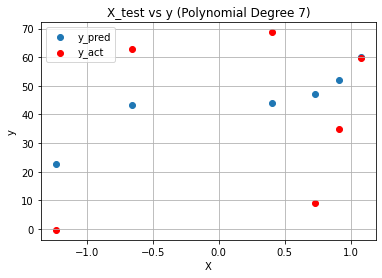

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.357e+02, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree8) 16.115712992969925
RMSE (test)(degree8) 23.09404828224557


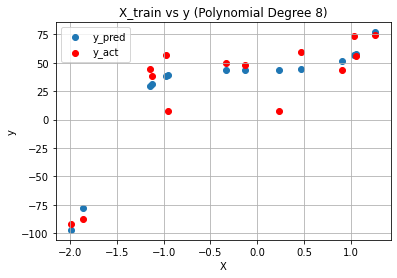

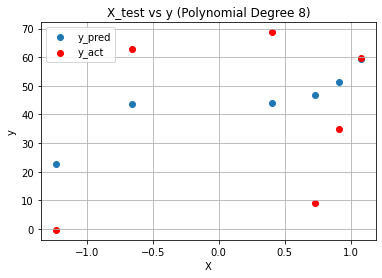

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.204e+02, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree9) 15.781332410663888
RMSE (test)(degree9) 23.48426821134904


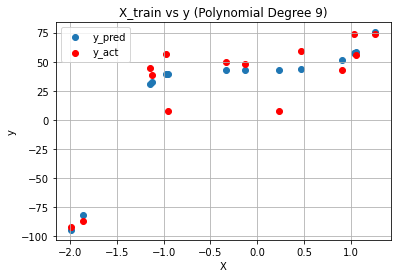

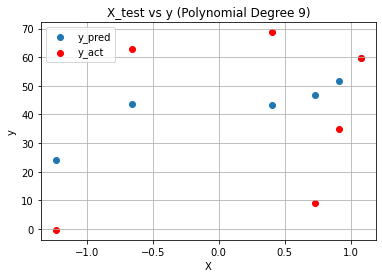

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.214e+02, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree10) 15.690959421623209
RMSE (test)(degree10) 23.597428432115763


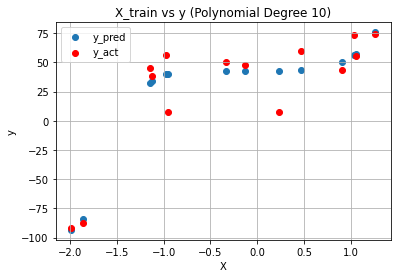

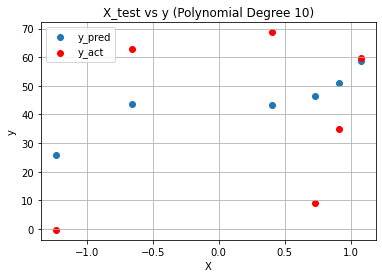

RMSE (train)(degree11) 15.661485451412489
RMSE (test)(degree11) 23.68995736186238


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


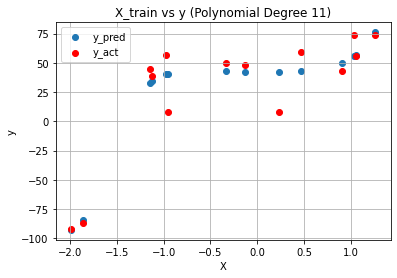

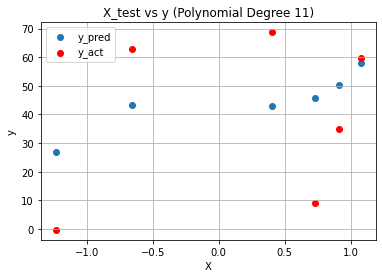

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree12) 15.633444279578375
RMSE (test)(degree12) 23.870235494103493


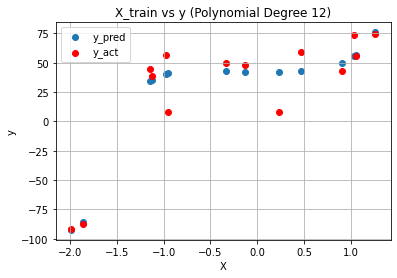

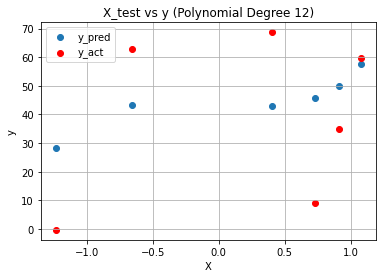

RMSE (train)(degree13) 15.62358682199315
RMSE (test)(degree13) 23.969948003611343


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.475e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


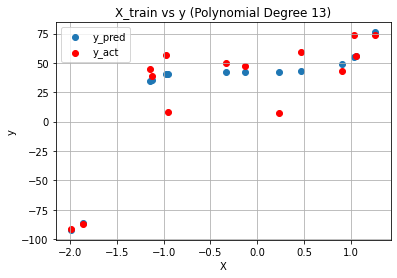

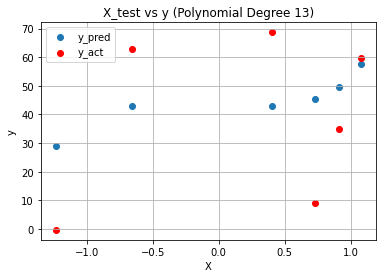

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree14) 15.623605353896101
RMSE (test)(degree14) 24.053553758991722


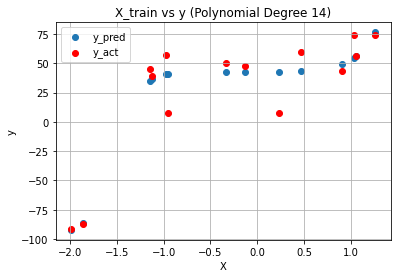

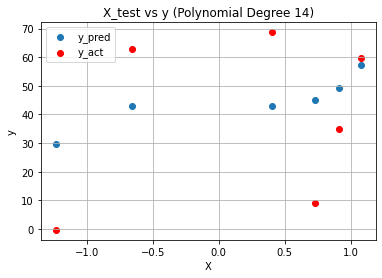

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree15) 15.614325047219278
RMSE (test)(degree15) 24.179255773507556


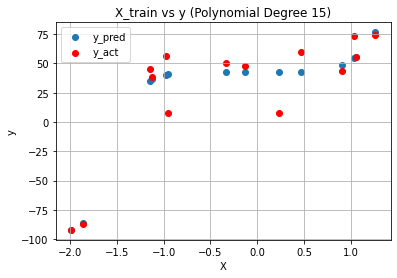

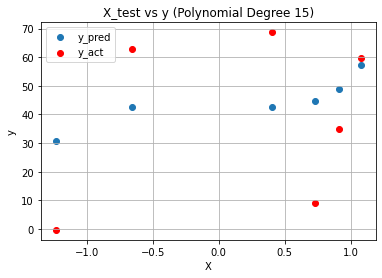

RMSE (train)(degree16) 15.59450610283118
RMSE (test)(degree16) 24.346800418690133


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.726e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


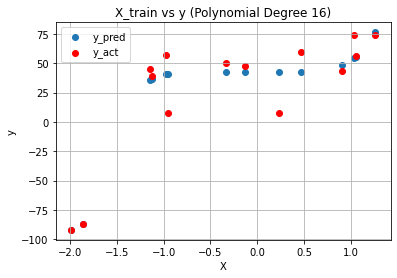

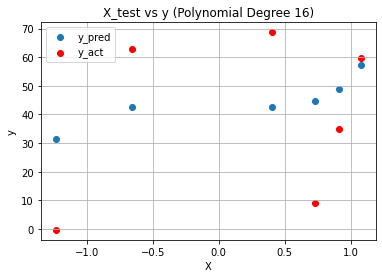

RMSE (train)(degree17) 15.572040222839213
RMSE (test)(degree17) 24.481635701709074


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


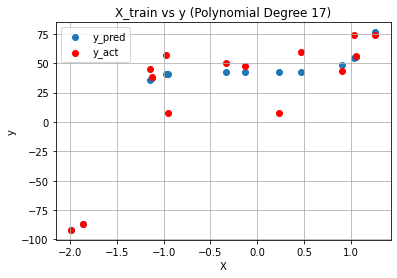

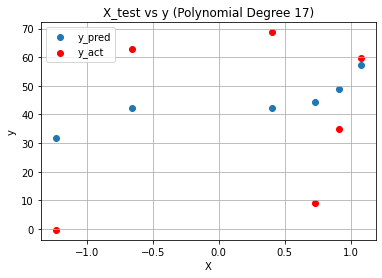

RMSE (train)(degree18) 15.554361589023076
RMSE (test)(degree18) 24.577498852241543


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


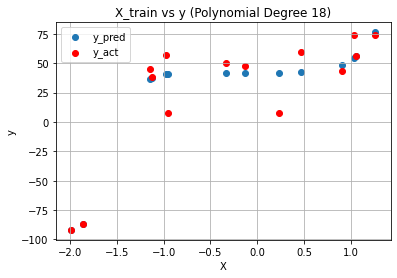

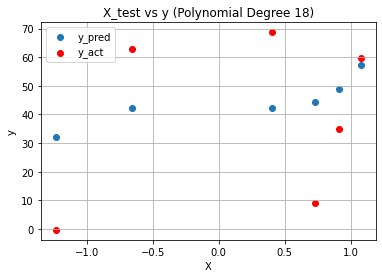

RMSE (train)(degree19) 15.537597530364126
RMSE (test)(degree19) 24.666775839267196


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.811e+03, tolerance: 3.670e+00
  model = cd_fast.enet_coordinate_descent(


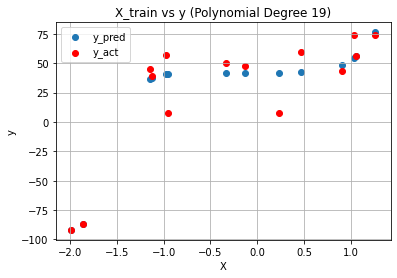

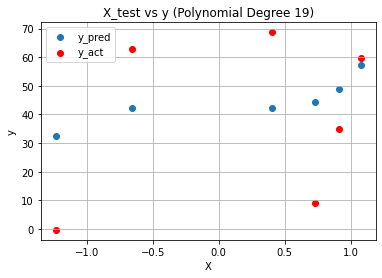

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

df1 = pd.read_csv("train_2.csv",header=None)
df = df1[:20]
X = np.array(df[0]).reshape(-1,1)
y =np.array(df[1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

max_degree = 20
rmse_train = []
rmse_test = []
for i in range(max_degree):
#     print(i)
    poly = PolynomialFeatures(degree = i)
    x_poly_train = poly.fit_transform(X_train)
    model = Lasso()
    model.fit(x_poly_train,y_train)
    y_pred = model.predict(x_poly_train)
    x_poly_test = poly.fit_transform(X_test)
    y_test_pred = model.predict(x_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')
    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

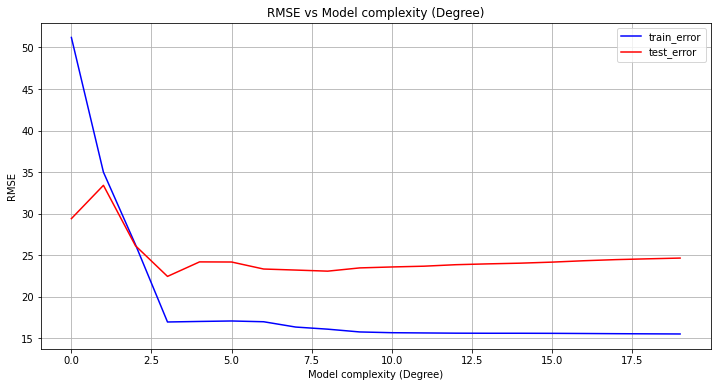

In [32]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label = 'train_error')
plt.plot(range(max_degree),rmse_test,c='r',label = 'test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test:  26.75869380538995


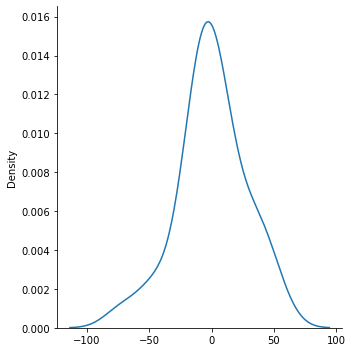

In [33]:
df_test = pd.read_csv('test_2.csv',header=None)
X_t = np.array(df_test[0]).reshape(-1,1)
y_t =np.array(df_test[1])


poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(X_t)
model = Lasso()
model.fit(x_poly,y_t)
y_pred = model.predict(x_poly)

test_noise = (y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test: ', np.sqrt(mse(y_pred,y_t)))

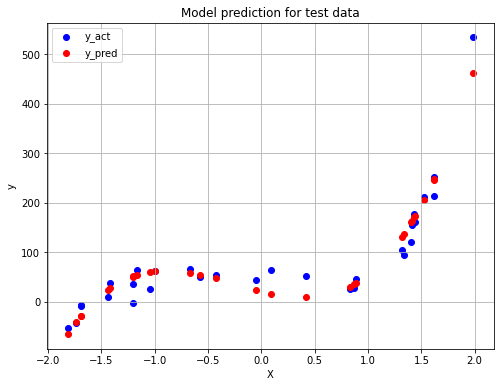

Optimized weights: [  0.         -54.36821567  37.11584574  51.29700192]


In [34]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label = 'y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('Optimized weights:' , model.coef_)